# Исследование игр интернет-магазина «Стримчик»

## Описание проекта

Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.


### Описание данных

`Name` — название игры;

`Platform` — платформа;

`Year_of_Release` — год выпуска;

`Genre` — жанр игры;

`NA_sales` — продажи в Северной Америке (миллионы проданных копий);

`EU_sales` — продажи в Европе (миллионы проданных копий);

`JP_sales` — продажи в Японии (миллионы проданных копий);

`Other_sales` — продажи в других странах (миллионы проданных копий);

`Critic_Score` — оценка критиков (максимум 100);

`User_Score` — оценка пользователей (максимум 10);

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Ниже приведены примеры:

    «EC» («Early childhood») — «Для детей младшего возраста»;
    «E» («Everyone») — «Для всех»;
    «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
    «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет;
    «M» («Mature») — «Для взрослых»;
    «AO» («Adults Only 18+») — «Только для взрослых»;
    «RP» («Rating Pending») — «Рейтинг ожидается»;
    «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+».

### Содержание

**Шаг 1. Откройте файл с данными и изучите общую информацию**

**Шаг 2. Подготовьте данные**

- Замените названия столбцов (приведите к нижнему регистру);

- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

- Обработайте пропуски;

- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Шаг 3. Проведите исследовательский анализ данных**

- Посмотрите, сколько игр выпускалось в разные годы. 
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
- Возьмите данные за соответствующий актуальный период.Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. 

**Шаг 4. Составьте портрет пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверьте гипотезы**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Шаг 6. Общий вывод**


## Загрузка данных

### Импорт библиотек

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st

### Первый обзор

In [28]:
data = pd.read_csv('/datasets/games.csv')
display(data.head())
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Работы много. Сразу видно пропуски, но о них позже. Сначала надо привести все заголовки к единому виду, т.е. нижнему регистру. Name, Platform, Genre, Rating стоит сделать типа string. Year_of_Release - int. User_Score - float. К тому же видно, что все уже существующие float имеют только 2 знака после запятой. Можно будет съэкономить память, преобразовав к float16

In [29]:
display(data.isna().sum())
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Name - 0%
Platform - 0%
Year_of_Release - 2%
Genre - 0%
NA_sales - 0%
EU_sales - 0%
JP_sales - 0%
Other_sales - 0%
Critic_Score - 51%
User_Score - 40%
Rating - 40%


6 столбцов из 11 имеют пропуски, причем в Critic_Score их 8578 - 51% всего датафрейма!

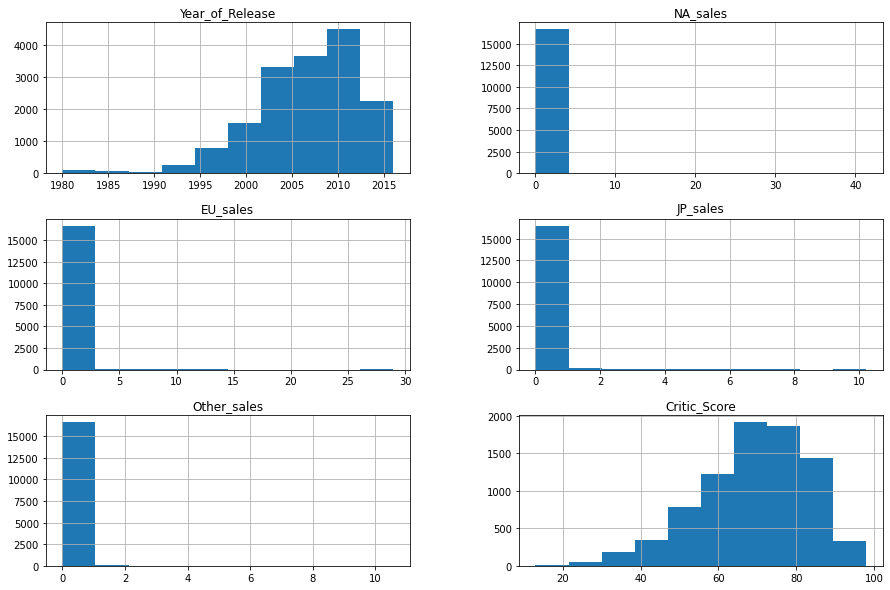

In [30]:
data.hist(figsize=(15, 10));

Пик игр приходится на 2010г, а критики любят давать оценку от 60 до 80. Проверим есть ли в датафрейме явные и неявные дубликаты.

### Поиск дубликатов

In [31]:
print('Количество явных дубликатов в датасете:',data[data.duplicated()].count()[0])

Количество явных дубликатов в датасете: 0


Явных дубликатов нет

In [32]:
display(data[data.duplicated(subset = ['Name', 'Platform', 'Year_of_Release'],keep='first')])
display(data[data.duplicated(subset = ['Name', 'Platform', 'Year_of_Release'],keep='last')])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Есть парочка, если проверять по определенным столбцам. Удалим

In [33]:
data = data.drop_duplicates(subset = ['Name', 'Platform', 'Year_of_Release']).reset_index(drop=True)

In [34]:
print('Name : ', np.sort(data['Name'].fillna('None').unique()))

Name :  [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!']


Почему-то у части значений в начале есть пробел. Надо будет избавиться. К тому же видно, что часть игр имеет в себе год выпуска. Можно будет воспользоваться для заполнения пропусков.

In [35]:
# к сожалению, unique не переваривает None. Основной датафрейм не трогаем
for game in np.sort(data['Name'].fillna('None').unique()):
    print(game)

 Beyblade Burst
 Fire Emblem Fates
 Frozen: Olaf's Quest
 Haikyu!! Cross Team Match!
 Tales of Xillia 2
'98 Koshien
.hack//G.U. Vol.1//Rebirth
.hack//G.U. Vol.2//Reminisce
.hack//G.U. Vol.2//Reminisce (jp sales)
.hack//G.U. Vol.3//Redemption
.hack//Infection Part 1
.hack//Link
.hack//Mutation Part 2
.hack//Outbreak Part 3
.hack//Quarantine Part 4: The Final Chapter
.hack: Sekai no Mukou ni + Versus
007 Racing
007: Quantum of Solace
007: The World is not Enough
007: Tomorrow Never Dies
1 vs. 100
1/2 Summer +
10 Minute Solution
100 All-Time Favorites
100 Classic Books
100 Classic Games
1000 Cooking Recipes from ELLE à table
1001 Touch Games
101-in-1 Explosive Megamix
101-in-1 Party Megamix Wii
101-in-1 Sports Megamix
101-in-1 Sports Party Megamix
1080°: TenEighty Snowboarding
11eyes: CrossOver
12-Sai. Honto no Kimochi
12-Sai. Koisuru Diary
12Riven: The Psi-Climinal of Integral
15 Days
1701 A.D.
18 Wheeler: American Pro Trucker
18 Wheels of Steel: Extreme Trucker
18 Wheels of Steel: Extre

На первый взгляд все в порядке, несмотря на то, что некоторые игры осталлись не дописаны(Order Up!!, например, следует доназвать Order Up!!To Go). Некоторые игры имеют по несколько выпусков.

In [36]:
display(data['Name'].value_counts(dropna=False).head(20))
data['Name'].str.lower().value_counts(dropna=False).head(20)

Need for Speed: Most Wanted                12
FIFA 14                                     9
Ratatouille                                 9
Madden NFL 07                               9
LEGO Marvel Super Heroes                    9
Madden NFL 08                               8
LEGO Jurassic World                         8
FIFA 15                                     8
LEGO The Hobbit                             8
LEGO Star Wars II: The Original Trilogy     8
Terraria                                    8
Monopoly                                    8
Lego Batman 3: Beyond Gotham                8
LEGO Harry Potter: Years 5-7                8
The LEGO Movie Videogame                    8
Angry Birds Star Wars                       8
FIFA Soccer 13                              8
Cars                                        8
FIFA Soccer 11                              7
Skylanders: Trap Team                       7
Name: Name, dtype: int64

need for speed: most wanted                    12
fifa 14                                         9
madden nfl 07                                   9
lego marvel super heroes                        9
ratatouille                                     9
monopoly                                        8
lego star wars ii: the original trilogy         8
lego batman 3: beyond gotham                    8
cars                                            8
madden nfl 08                                   8
the lego movie videogame                        8
fifa 15                                         8
lego harry potter: years 5-7                    8
terraria                                        8
lego the hobbit                                 8
lego jurassic world                             8
angry birds star wars                           8
fifa soccer 13                                  8
lego indiana jones: the original adventures     7
lego star wars iii: the clone wars              7


Некоторые игры могли быть с ошибками в регистре, но на первый взгляд даже здесь все нормально. Проверим другие столбцы.

In [37]:
print('Уникальные значения столбца Platform : ',  end='')
print(*np.sort(data['Platform'].unique()), sep=', ', end='.\n')
print('Количество возможных платформ:', len(data['Platform'].unique()))

print(' Уникальные значения столбца Year_of_Release : ',  end='')
print(*np.sort(data['Year_of_Release'].unique()), sep=', ', end='.\n')
print(' Уникальные значения столбца Genre : ',  end='')
print(*np.sort(data['Genre'].fillna('None').unique()), sep=', ', end='.\n')
print(' Уникальные значения столбца Rating : ',  end='')
print(*np.sort(data['Rating'].fillna('None').unique()), sep=', ', end='.\n')



Уникальные значения столбца Platform : 2600, 3DO, 3DS, DC, DS, GB, GBA, GC, GEN, GG, N64, NES, NG, PC, PCFX, PS, PS2, PS3, PS4, PSP, PSV, SAT, SCD, SNES, TG16, WS, Wii, WiiU, X360, XB, XOne.
Количество возможных платформ: 31
 Уникальные значения столбца Year_of_Release : 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, nan.
 Уникальные значения столбца Genre : Action, Adventure, Fighting, Misc, None, Platform, Puzzle, Racing, Role-Playing, Shooter, Simulation, Sports, Strategy.
 Уникальные значения столбца Rating : AO, E, E10+, EC, K-A, M, None, RP, T.


Здесь все в полном порядке. Учитывая, что платформ может быть 31, а повторений игр не более 12(максимальное, см. выше), то скорее всего игры вроде Need for Speed: Most Wanted просто вышли на нескольких платформах. Если бы повторений оказалось больше 31 - пришлось бы искать неточности в данных. 
Никаких годов вроде 1002 нет. Лишних категорий тоже. Все рейтинги существуют, никаких опечаток.

На выбросы посмотрим в разделе предобрадотки и/или исследовательского анализа.

### Краткий вывод 



В данных довольно много пропусков, особенно в разделах оценок игр и рейтинга. 51% по столбцу - наибольший процент недостающих значений. Колонки названы не по правилу. Однако, стоит заметить, что дубликатов оказалось всего 2, и были удалены. При дальнейшем исследовании неявные дубликаты обнаружены не были.

## Предобработка данных

### Приведение к нижнему регистру

In [38]:
print('Названия колонок до переименования:', *data.columns)
data.columns = data.columns.str.lower()
print('После:', *data.columns)

Названия колонок до переименования: Name Platform Year_of_Release Genre NA_sales EU_sales JP_sales Other_sales Critic_Score User_Score Rating
После: name platform year_of_release genre na_sales eu_sales jp_sales other_sales critic_score user_score rating


### Преобразование типов данных

Напомним сколько памяти занимало в начале

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [40]:
data.memory_usage(index=False)

name               133704
platform           133704
year_of_release    133704
genre              133704
na_sales           133704
eu_sales           133704
jp_sales           133704
other_sales        133704
critic_score       133704
user_score         133704
rating             133704
dtype: int64

In [41]:
# преобразуем столбцы без пропусков в float16
to_float = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']
for column_name in to_float:
    data[column_name] = data[column_name].astype('float16')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float16
 5   eu_sales         16713 non-null  float16
 6   jp_sales         16713 non-null  float16
 7   other_sales      16713 non-null  float16
 8   critic_score     8136 non-null   float16
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float16(5), float64(1), object(5)
memory usage: 946.8+ KB


Сэкономили около 0,5Мб -> быстрее будет работать.

In [42]:
# если заходить через Int64 - съест больше памяти(на 10Кб)
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [43]:
data.loc[(data['user_score']  == 'tbd'), 'user_score'] = None
data['user_score'] = data['user_score'].fillna('130')
data['user_score'] = data['user_score'].astype('float16')
data.loc[(data['user_score'] == 130), 'user_score'] = None

In [44]:
print('Рейтинги в датасете:', *data['rating'].unique())

Рейтинги в датасете: E nan M T E10+ K-A AO EC RP


In [46]:
to_string = ['rating']
for column_name in to_string:
    data[column_name] = data[column_name].fillna('None')
# data.info()    

In [47]:
# check
data['rating'].value_counts()

None    6765
E       3989
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [48]:
to_string = ['name', 'platform', 'genre', 'rating']
for column_name in to_string:
    data[column_name] = data[column_name].fillna('None')
    
    print(data.info())
    
    data[column_name] = data[column_name].astype('string')
    data.loc[(data[column_name] == 'None'), column_name] = None 
# data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float16
 5   eu_sales         16713 non-null  float16
 6   jp_sales         16713 non-null  float16
 7   other_sales      16713 non-null  float16
 8   critic_score     8136 non-null   float16
 9   user_score       7589 non-null   float16
 10  rating           16713 non-null  object 
dtypes: Int64(1), float16(6), object(4)
memory usage: 865.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1

In [49]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  string 
 1   platform         16713 non-null  string 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  string 
 4   na_sales         16713 non-null  float16
 5   eu_sales         16713 non-null  float16
 6   jp_sales         16713 non-null  float16
 7   other_sales      16713 non-null  float16
 8   critic_score     8136 non-null   float16
 9   user_score       7589 non-null   float16
 10  rating           9948 non-null   string 
dtypes: Int64(1), float16(6), string(4)
memory usage: 865.2 KB


Библиотеки лучше работают со строками и с точки зрения памяти, и с производительности. В *string* так просто нельзя будет положить, например, число, что дает больший контроль над ошибками.

Над памятью поработали: от 1.4Мб перешли к 865Кб. Теперь займемся пропусками.

####  удаление пропусков в Name

In [50]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,<NA>,GEN,1993,<NA>,1.780273,0.529785,0.0,0.080017,NaN,NaN,<NA>


1 строки пропусков из name совпадают с genre. Отсутствуют значения и в других столбцах. Такие данные проще удалить.

In [51]:
data = data.dropna(subset=['name'])
data[data['name'].isna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  string 
 1   platform         16712 non-null  string 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  string 
 4   na_sales         16712 non-null  float16
 5   eu_sales         16712 non-null  float16
 6   jp_sales         16712 non-null  float16
 7   other_sales      16712 non-null  float16
 8   critic_score     8136 non-null   float16
 9   user_score       7589 non-null   float16
 10  rating           9948 non-null   string 
dtypes: Int64(1), float16(6), string(4)
memory usage: 995.5 KB


### Обработка пропусков

In [52]:
display(data.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [53]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

In [54]:
(data.isna().mean()*100).to_frame()

,0
name,0.000000
platform,0.000000
year_of_release,1.609622
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.316419
user_score,54.589517


#### Rating

In [57]:
# оценим сколько без рейтинга
data['rating'] = data['rating'].fillna('NoRat')
dat_raiting = data['rating'].value_counts()
display(dat_raiting)
labels = list(dat_raiting.index)[:5] + ['others']
count_rows = data.shape[0]
dat = []
for num in dat_raiting[:5]:
    dat.append(num/count_rows * 100)
other = 0
for num in dat_raiting[5:]:
    other += num/count_rows * 100

dat.append(other)
del other
del dat_raiting
for i in range(6):
    print(labels[i], ' : ', round(dat[i],2),'%')

NoRat    6764
E        3989
T        2961
M        1563
E10+     1420
EC          8
K-A         3
RP          3
AO          1
Name: rating, dtype: Int64

NoRat  :  40.47 %
E  :  23.87 %
T  :  17.72 %
M  :  9.35 %
E10+  :  8.5 %
others  :  0.09 %


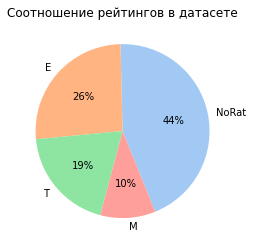

In [58]:
# незачем выводить 0% - не видно и портит вид даже с others
colors = sns.color_palette('pastel')[ 0:5 ]
plt.title('Соотношение рейтингов в датасете')
plt.pie(dat[:4], labels = labels[:4], autopct='%.0f%%', startangle=-68, colors=colors)
plt.show()

 Возможно, из-за того, что Entertainment Software Rating Board является американской компанией, пользователи в странах в Европе или Японии не обращают на него внимания. 

In [59]:
# создадим столбец и чекнем выгодно ли заполнить 
data['all_saled'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

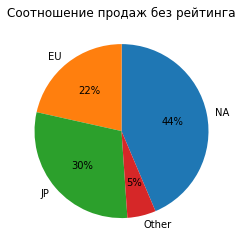

In [60]:
dats = data.loc[data['rating'] == 'NoRat']
all_saled = dats['all_saled'].sum()
dat =  [dats['na_sales'].sum() /all_saled, dats['eu_sales'].sum() /all_saled, \
        dats['jp_sales'].sum() /all_saled, dats['other_sales'].sum() /all_saled]
labels = ['NA', 'EU', 'JP', 'Other']
plt.title('Соотношение продаж без рейтинга')
plt.pie(dat, labels = labels, autopct='%.0f%%', startangle=-67,)
plt.show()

Забавно, похоже именно в Северной Америке больше всего продаж без рейтинга. Может, зависит от года?

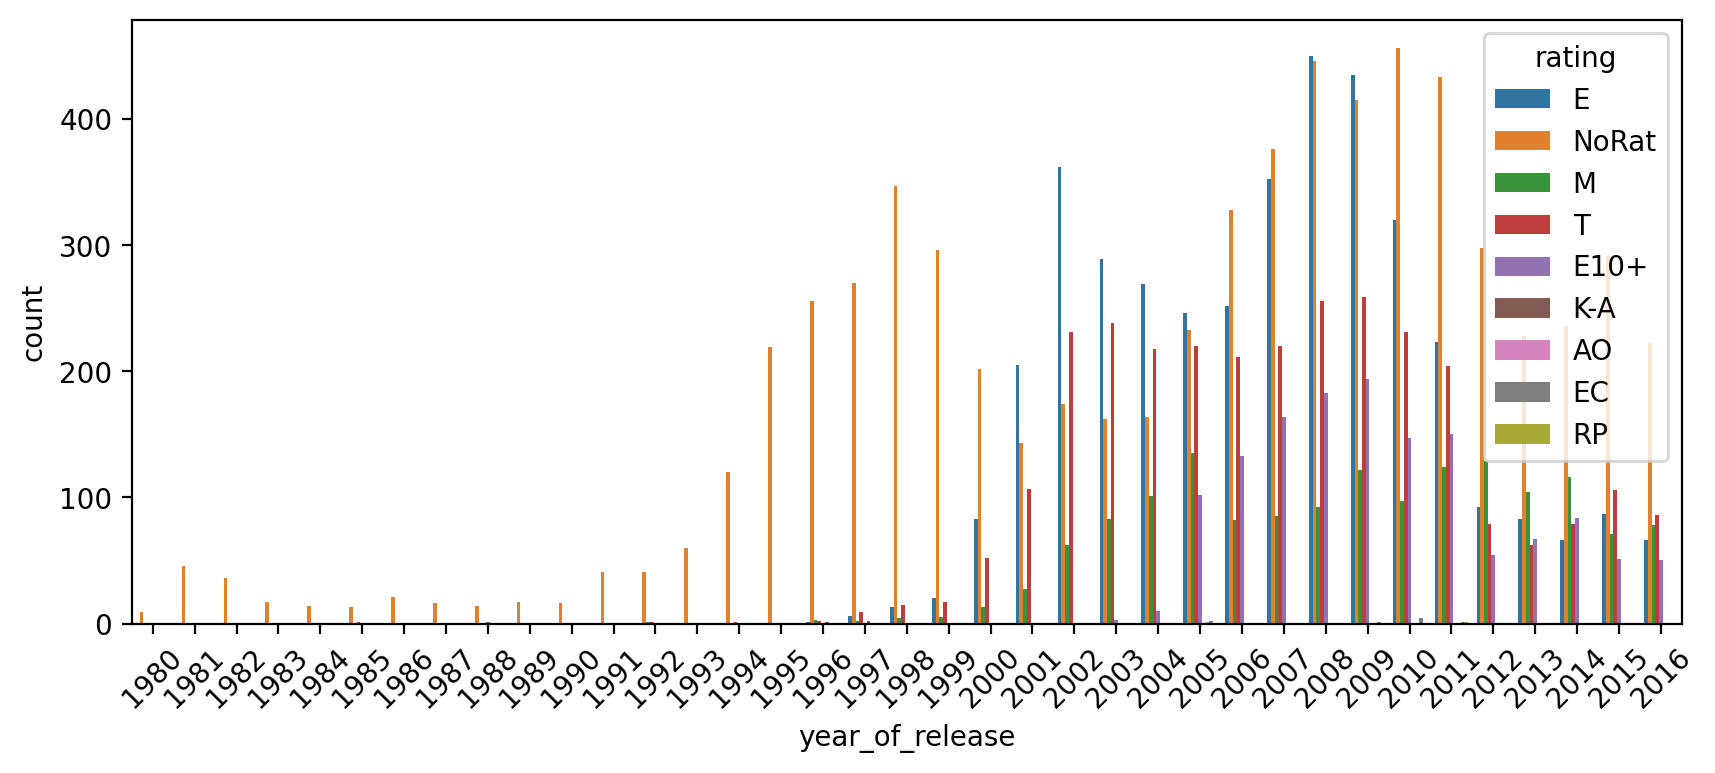

In [61]:
plt.figure(figsize=(10,4),dpi=200)
my_plot = sns.countplot(x='year_of_release',data=data[~data['year_of_release'].isna()],hue='rating')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.show()

Похоже, рейтинги начали давать примерно с 1996(годом основания ESRB считается сентябрь 1994 - так что здесь логично), постепенно набирая обороты. Но и игр становилось больше, так что, скорее всего, компания не успевала дать рейтинги всем, тк после 2006 все еще много игр без рейтинга. 
Что ж, можно считать, что пропуски в rating частично обусловлены годом выпуска игр. Также данные могли потеряться по техническим причинам. При более детальном просмотре данных таблицы видно, что в стобцах, где пропущен рейтинг, также часто есть пропуски в critic_score, user_score. Скорее всего, это результат слияния нескольких таблиц. Рекомендуется проверить способ выгрузки данных.



#### Year_of_Release
Пропуски в year_of_release можно не заполнять, они занимают всего 2% датасета(см. раздел "Первый обзор"). Тогда остались critic_score и user_score.

#### Critic_Score & User_Score

Напомним, что в user_score куда больше пропусков. В целом, оценку можно категоризировать как пропуски типа MNAR (Missing Not At Random) 

In [62]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
all_saled             0
dtype: int64

In [63]:
correlation = data['critic_score'].corr(data['user_score'])
correlation

0.581119611008899

По шкале Чеддока между оценками средняя корреляция. Часть значений можно заполнить

In [64]:
data.loc[(~data['critic_score'].isna()) & (data['user_score'].isna()), 'user_score'] = data['critic_score']/10
# и в обратную сторону
data.loc[(~data['user_score'].isna()) & (data['critic_score'].isna()), 'critic_score'] = data['user_score']*10

In [65]:
# user_score измеряется через ИПУ
def categorize_by_CSI(score):
    try:
        if 0 <= score <= 20: #крайне неудовлетворен
            return 'E'
        elif 21 <= score <= 40:
            return 'D'
        elif 41 <= score <= 60:
            return 'C'
        elif 61 <= score <= 80:
            return 'B'
        elif 81 <= score <= 100: # полностью удовлетворен
            return 'A'
    except:
        pass

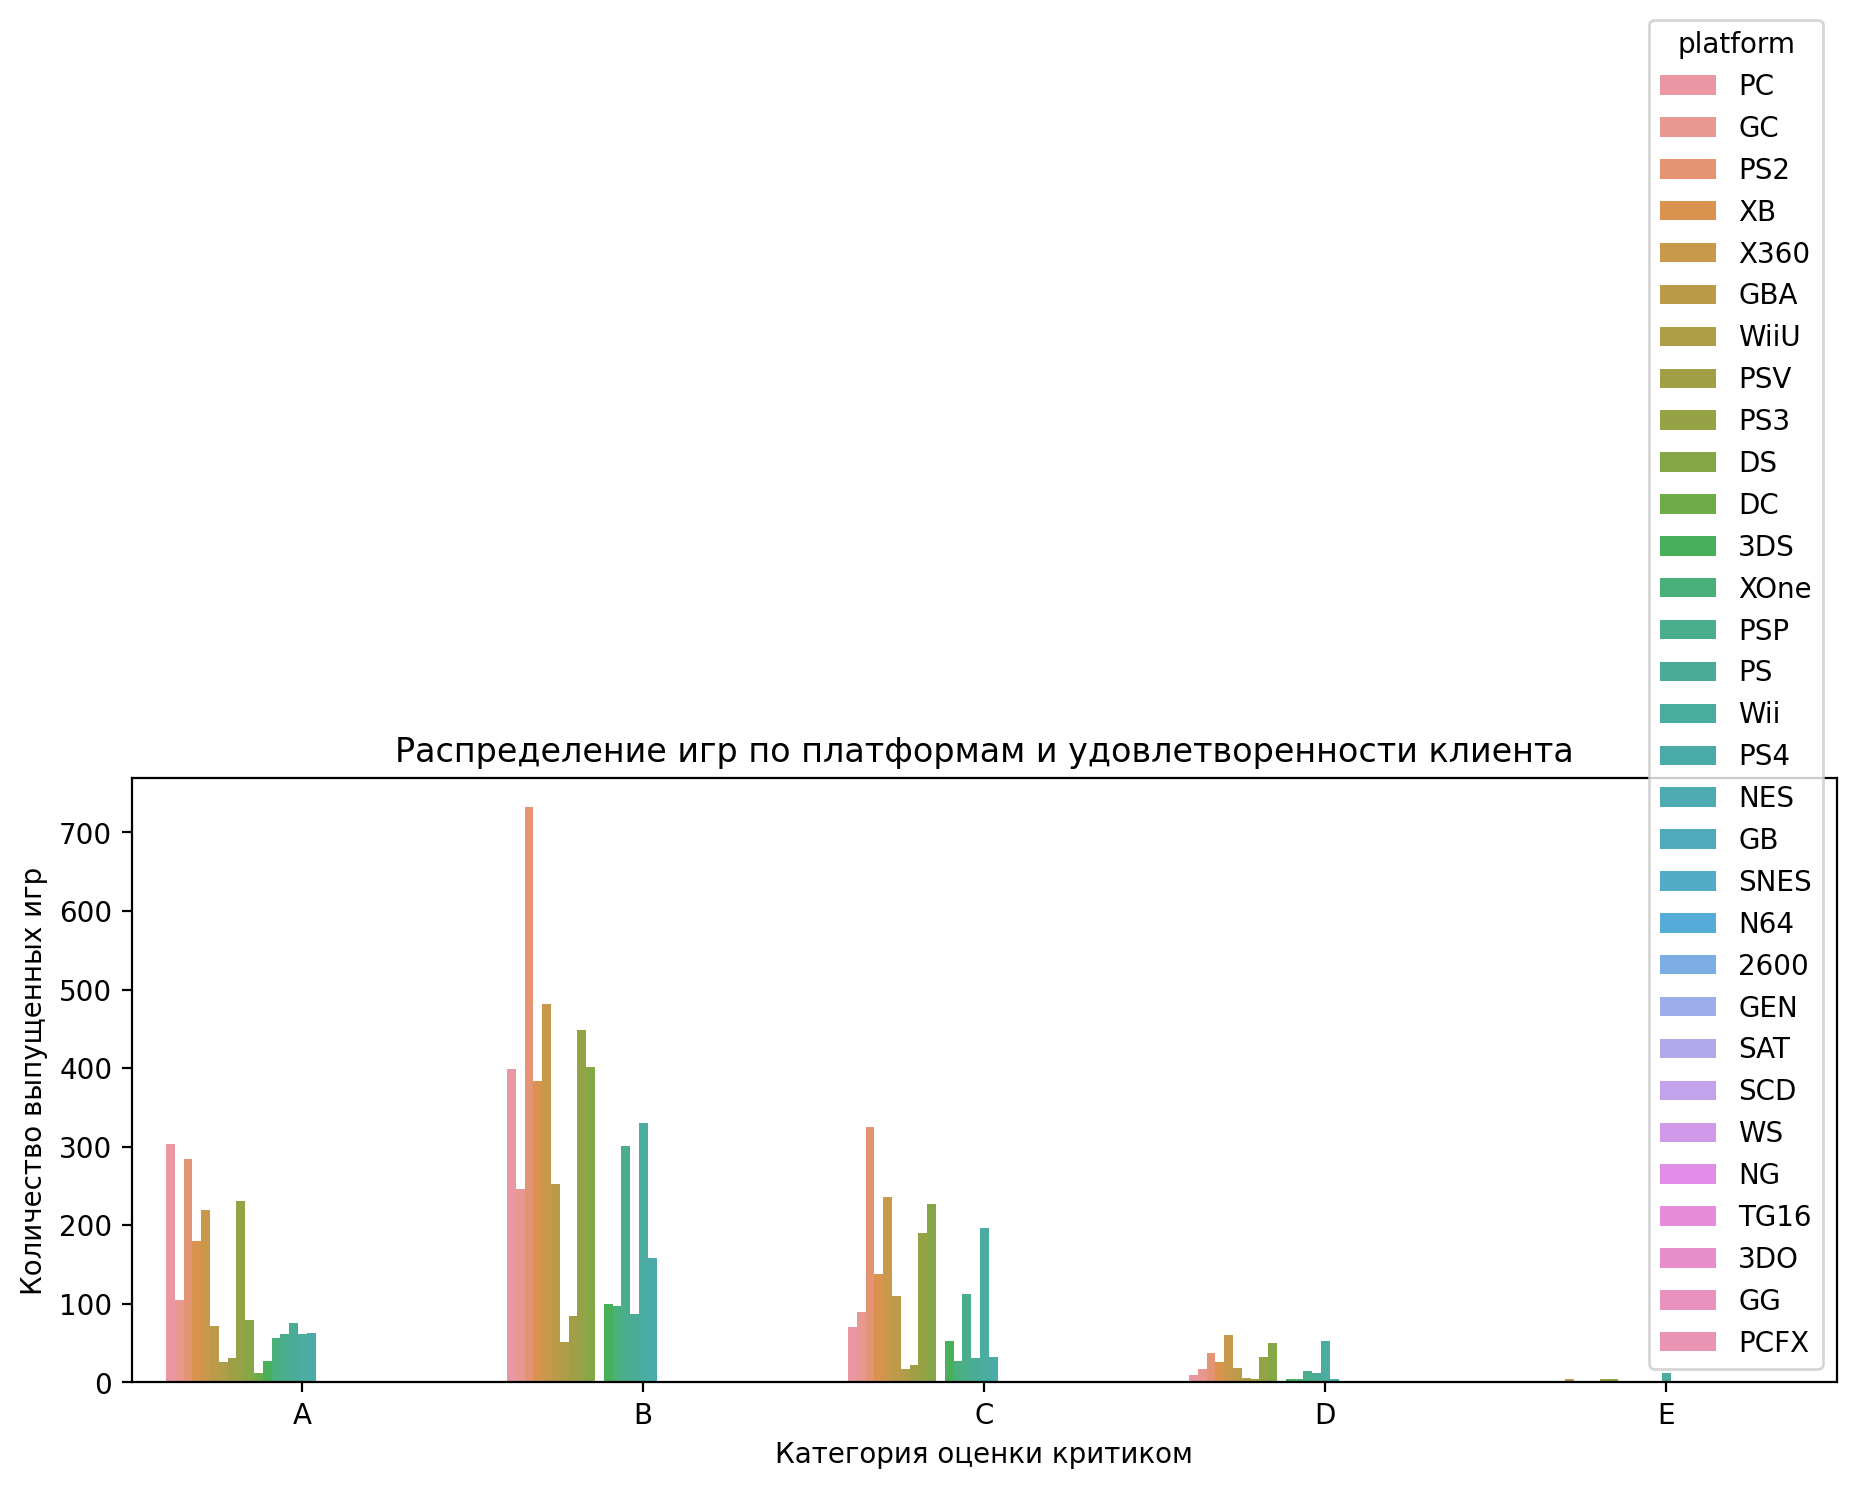

In [66]:
data['critic_category'] = data['critic_score'].apply(categorize_by_CSI)
plt.figure(figsize=(11,4),dpi=200)
sns.countplot(x='critic_category',data=data.sort_values(by='critic_category'),hue='platform')
plt.xlabel('Категория оценки критиком')
plt.ylabel('Количество выпущенных игр')
plt.title('Распределение игр по платформам и удовлетворенности клиента')
plt.show()

In [67]:
print('При дальнейшем анализе придется время от времени срезать', round(data['critic_score'].isna().sum()/data.shape[0],3)*100, '% пропусков')


При дальнейшем анализе придется время от времени срезать 47.9 % пропусков


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16712
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  string 
 1   platform         16712 non-null  string 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  string 
 4   na_sales         16712 non-null  float16
 5   eu_sales         16712 non-null  float16
 6   jp_sales         16712 non-null  float16
 7   other_sales      16712 non-null  float16
 8   critic_score     8709 non-null   float16
 9   user_score       8709 non-null   float16
 10  rating           16712 non-null  string 
 11  all_saled        16712 non-null  float16
 12  critic_category  8709 non-null   object 
dtypes: Int64(1), float16(7), object(1), string(4)
memory usage: 1.6+ MB


### Краткий вывод 



Названия колонок были приведены к нижнему регистру. Преобразованы типы данных столбцов na_sales, eu_sales, jp_sales, other_sales, critic_score к float16. Также создан новый столбец того же типа all_saled - сумма продаж по всем 4 столбцам. Пропуски в year_of_release составляют 2% - их решено было оставить незаполненными, и тип преобразовать к int. Остальные столбцы - к string. Это безопаснее и экономит память.

Пропуски из name были удалены.
Пропуски в rating частично обусловлены годом выпуска игр. Так, рейтинги начали давать примерно с 1996(годом основания ESRB считается  1994), постепенно набирая обороты. Но и игр становилось больше, так что, скорее всего, компания не успевала дать рейтинги всем, тк после 2006 все еще много игр без рейтинга. Около 43% датасета, не имеющего рейтинга, были заполнены строкой 'NoRat'.

Пропуски в оценке частично заполнены из user_score в critic_score и наоборот.

Данные могли потеряться по техническим причинам. При более детальном просмотре таблицы видно, что в стобцах, где пропущен рейтинг, также часто есть пропуски в critic_score, user_score. Скорее всего, это результат слияния нескольких таблиц. Рекомендуется проверить способ выгрузки данных.


## Исследовательский анализ данных

### Количество игр по годам

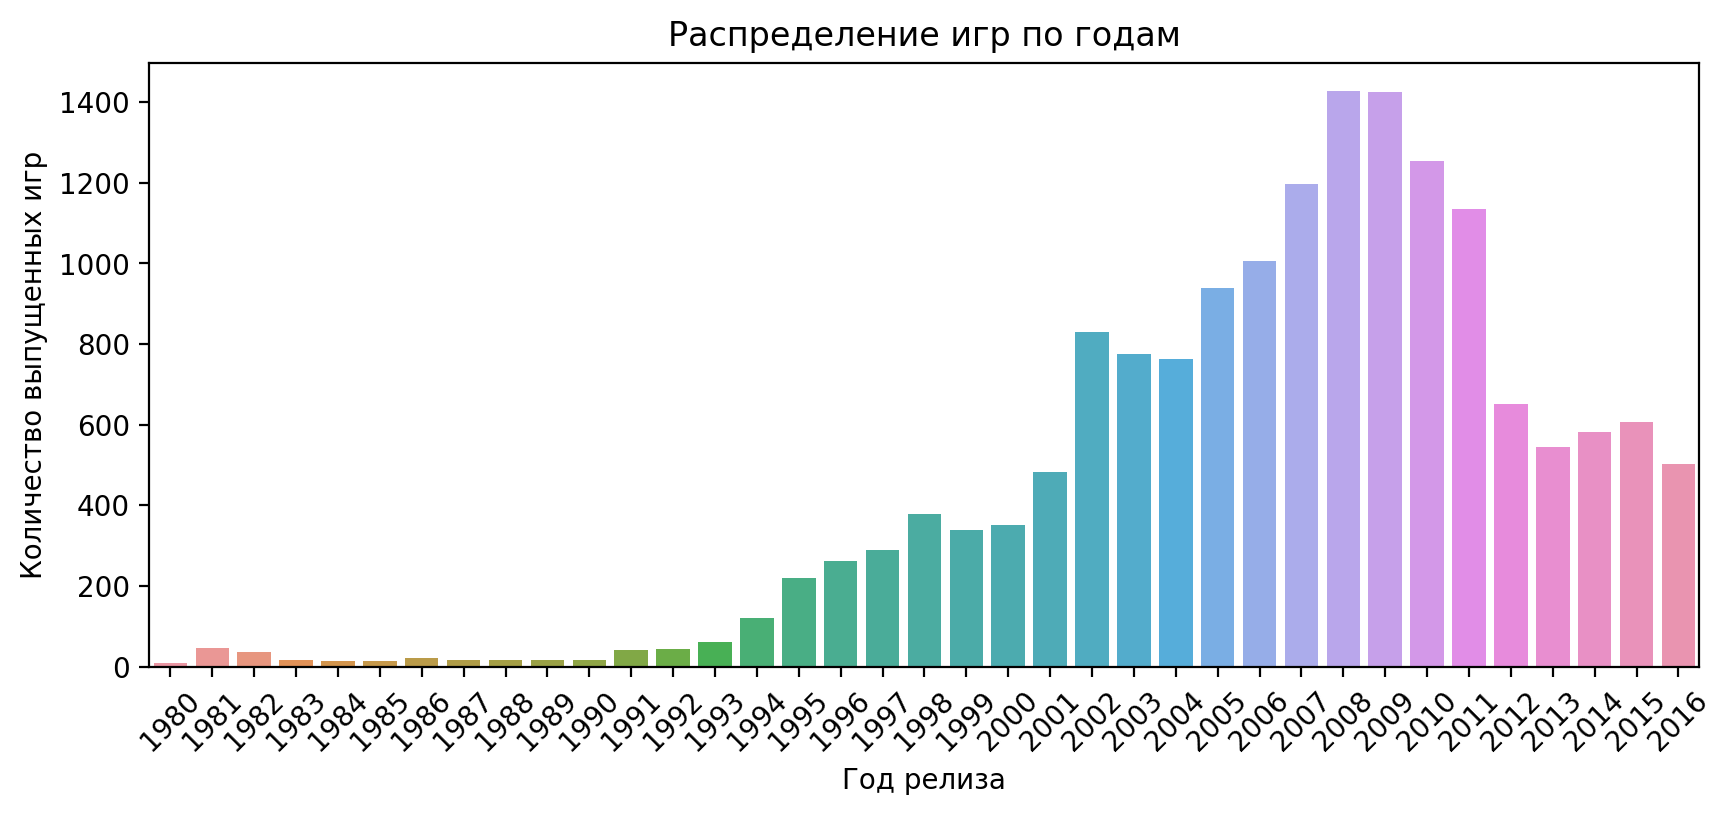

In [70]:
plt.figure(figsize=(10,4),dpi=200)
my_plot = sns.countplot(data=data[~data['year_of_release'].isna()], x='year_of_release')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.xlabel('Год релиза')
plt.ylabel('Количество выпущенных игр')
plt.title('Распределение игр по годам')
plt.show()

Можно сказать, что рост производства игр начался с 1991г. Претерпел несколько пиков: в 1998, 2002, 2008 и 2015 по количеству выпущенных. Это странно, поскольку было бы логично, что с развитием индустрии количество игр должно расти. Так как целью является прогнозирование для интернет-магазина, то возьмем данные за последние 3 года.

In [71]:
# актуальный период
actual_years = data.query('year_of_release > 2013')

### Продажи по платформам

In [72]:
# создадим датафрейм, в котором нет None в year_of_release с актуальным годом
df = actual_years[~actual_years['year_of_release'].isna()]

#### Средняя продолжительность жизни платформы

Посмотрим какие платформы самые популярные. Возьмем топ-6 по встречаемости

In [73]:
temp_dat_no_none_years = data[~data['year_of_release'].isna()]
top_platforms_list = list(temp_dat_no_none_years.groupby('platform')['all_saled'].sum().nlargest(6).index)
top_platforms = temp_dat_no_none_years.query('platform in @top_platforms_list')
print('Топ-6 популярных платформ: ',end='')
print( *top_platforms_list,sep=', ',end='.')
del top_platforms_list

Топ-6 популярных платформ: PS2, X360, PS3, Wii, DS, PS.

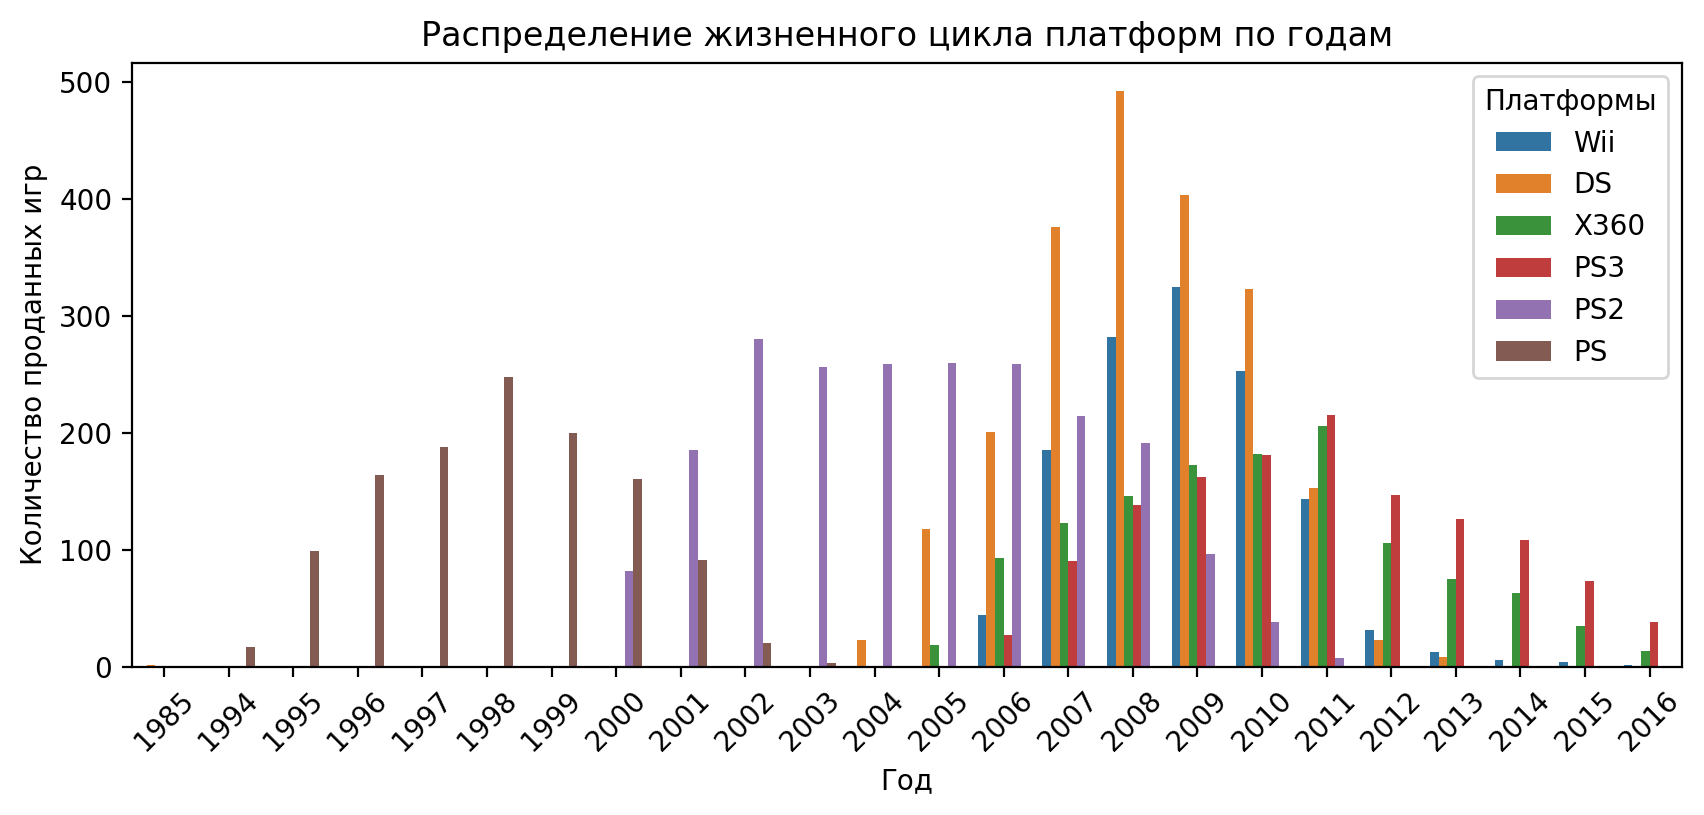

In [74]:
plt.figure(figsize=(10,4),dpi=200)
my_plot = sns.countplot(x='year_of_release',data=top_platforms,hue='platform');
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.xlabel('Год')
plt.ylabel('Количество проданных игр')
plt.title('Распределение жизненного цикла платформ по годам')
my_plot.legend(title='Платформы')
del top_platforms;

Каждая из платформ сначала платформа становится популярной, затем медленно угасает. 

Wii прожила 9 лет;

DS - 10 лет;

X360 - 12;

PS3 - 11;

PS2 - 11;

3DС - 6;

PS - 9.

Поулчается, в среднем платформа живет 10 лет.


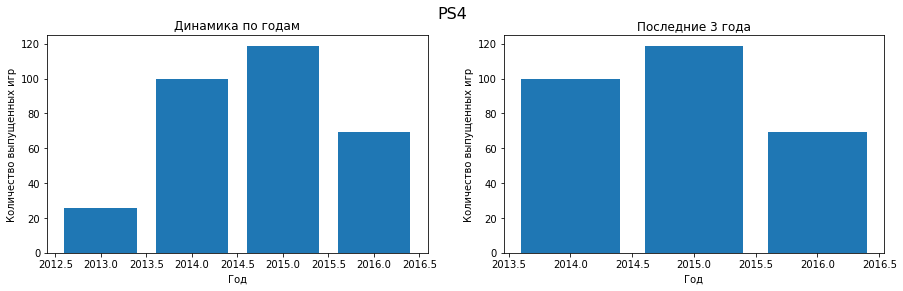

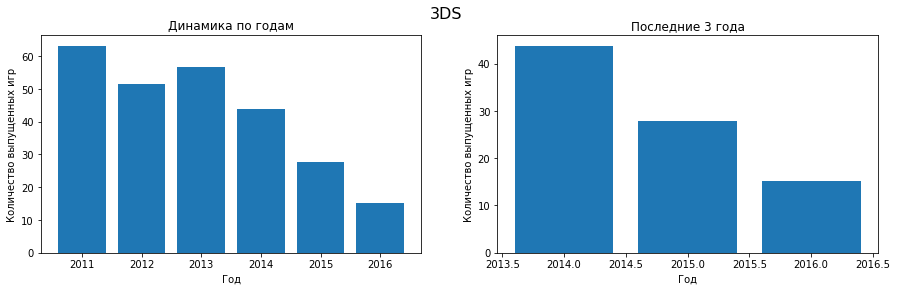

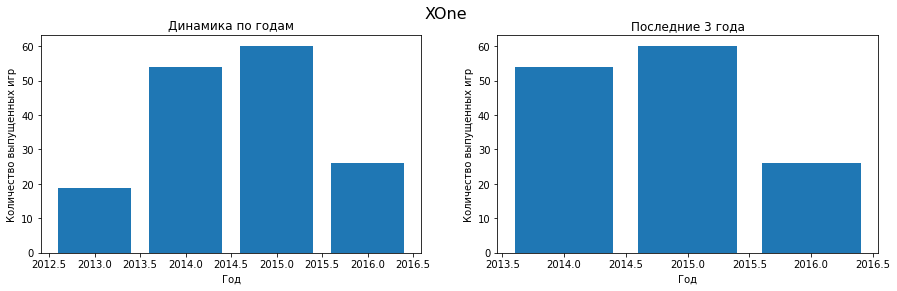

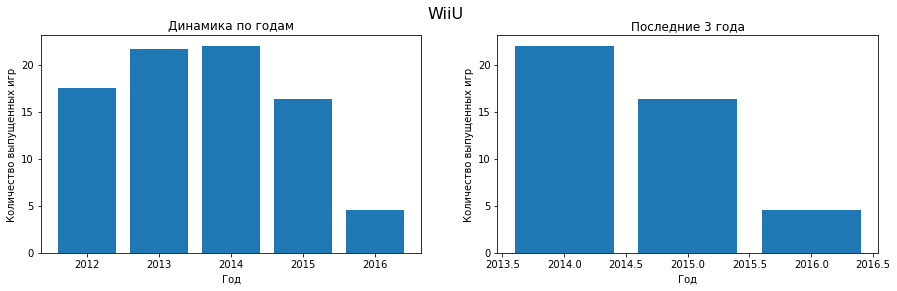

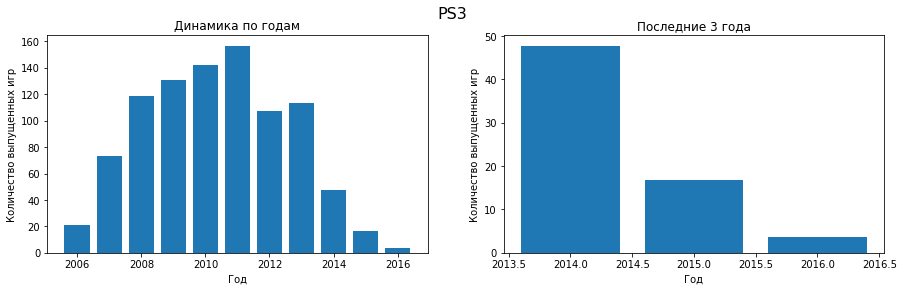

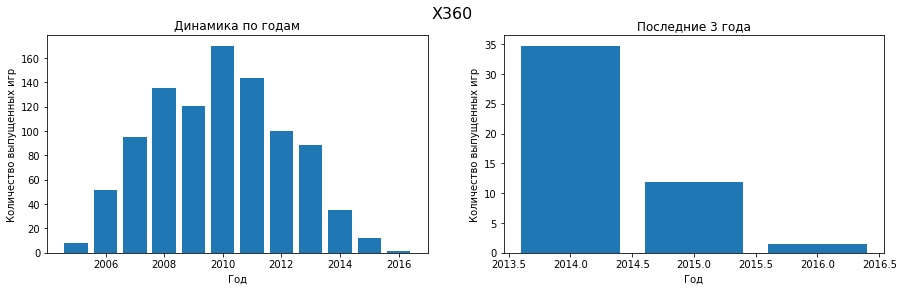

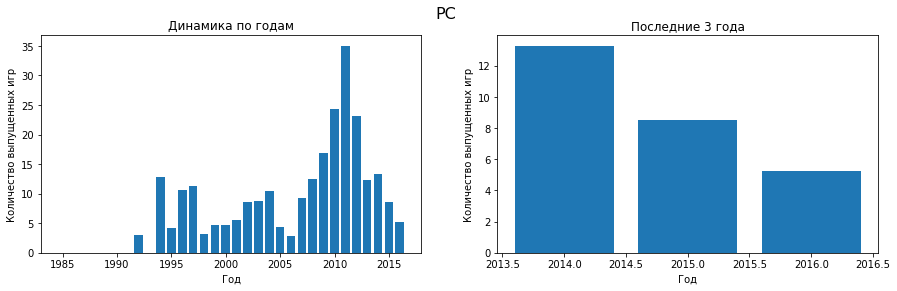

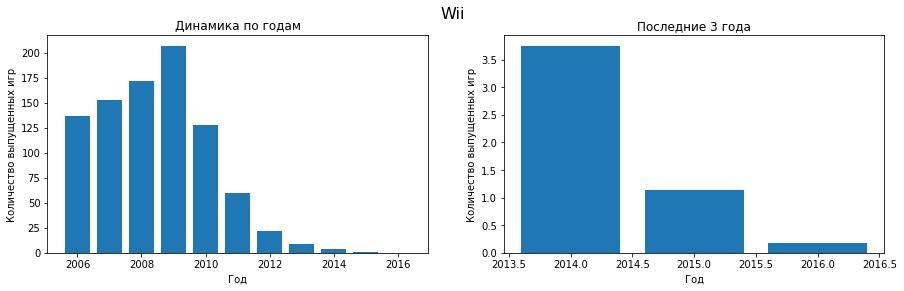

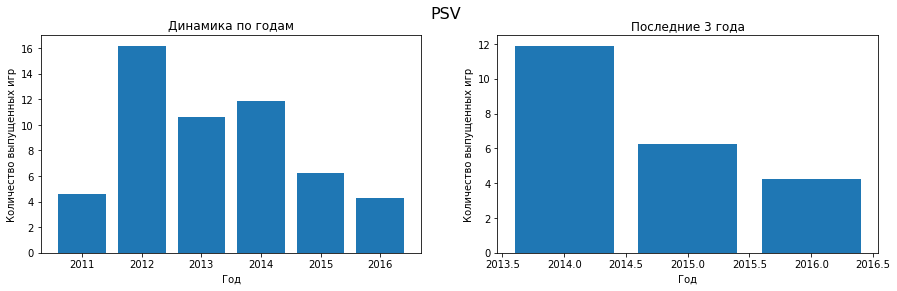

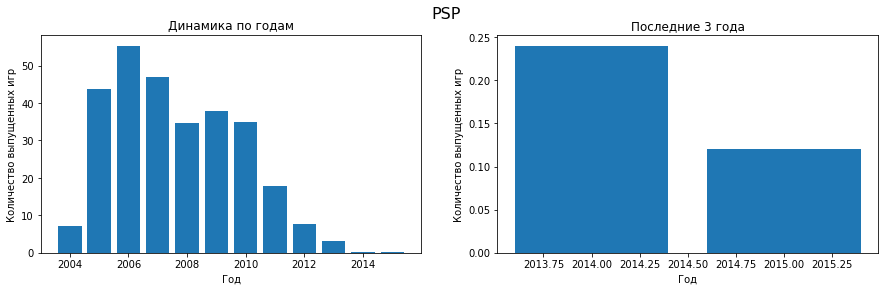

In [75]:
for platform in actual_years['platform'].unique():
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
    

    new_dat_for_years = pd.pivot_table(temp_dat_no_none_years.query('platform == @platform'), \
                                       index=['year_of_release'], values=['all_saled'],aggfunc=('sum'))\
                                        .reset_index()
    axes[0].set_title('Динамика по годам')
    axes[0].set_ylabel('Количество выпущенных игр')
    axes[0].set_xlabel('Год')
    axes[0].bar(new_dat_for_years['year_of_release'], new_dat_for_years['all_saled'])
    
    new_dat_actual_years = pd.pivot_table(actual_years.query('platform == @platform'), \
                                       index=['year_of_release'], values=['all_saled'],aggfunc=('sum'))\
                                        .reset_index()
    axes[1].set_title('Последние 3 года')
    axes[1].set_ylabel('Количество выпущенных игр')
    axes[1].set_xlabel('Год')
    axes[1].bar(new_dat_actual_years['year_of_release'], new_dat_actual_years['all_saled'])
    
    
    fig.suptitle(platform,fontsize=16)
    plt.show()
   

Отберем перспективные. На данный момент работают на PS4, 3DS, XOne, WiiU, PS3, X360, PC, Wii, PSV, PSP. Другие перестали поддерживать ПО.
Перспективными будем считать те, что продали более 10млн копий на 2016:  XOne, 3DS, PS4. Набирают популярность XOne и PS4 - их стоит выделить.

#### Ящик с усами

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Возьмем самые популярные(топ-5) и жизнеспособные.

In [76]:
top_platforms = list(actual_years['platform'].unique())
print('Топ живущих на 2016г платформ: ',end='')
print( *top_platforms,sep=', ',end='.')

Топ живущих на 2016г платформ: PS4, 3DS, XOne, WiiU, PS3, X360, PC, Wii, PSV, PSP.

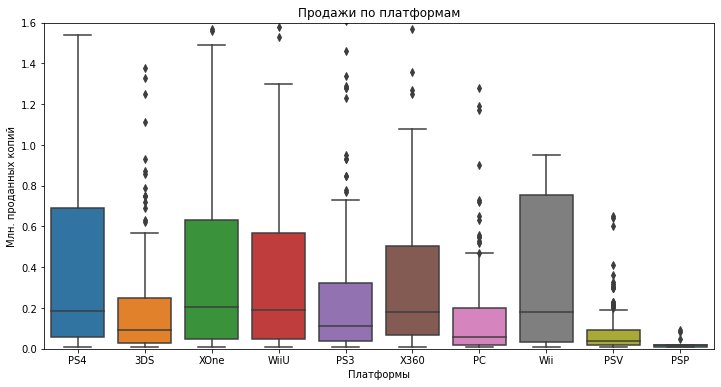

In [77]:
plt.figure(figsize=(12,6))
plt.ylim(0,1.6)
sns.boxplot(x='platform',y='all_saled',data=actual_years[actual_years['platform'].isin(top_platforms)])
plt.xlabel('Платформы')
plt.ylabel('Млн. проданных копий')
plt.title('Продажи по платформам')
plt.show()

Медианы всех выбранных платформ не доходят до 0,3млн. проданных. Однако, у всех выбранных платформ есть выбросы - игры, которые "выстрелили". 75% у PS4, XOne, WiiU и Wii меньше 0,7 млн копий. Зато получили подверждение, что PS4 и XOne перспективны - их максимальное значение, не являющееся выбросом около 1,5млн копий.

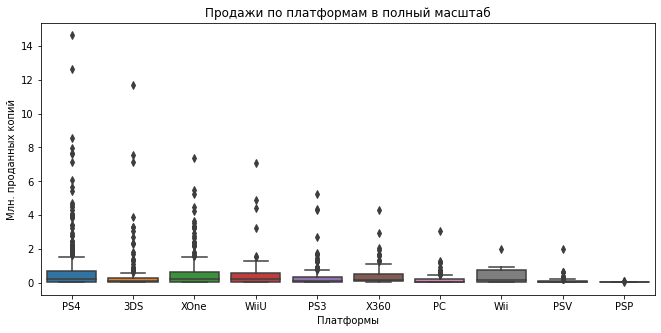

In [78]:
plt.figure(figsize=(11,5))
sns.boxplot(x='platform',y='all_saled',data=actual_years[actual_years['platform'].isin(top_platforms)])
plt.xlabel('Платформы')
plt.ylabel('Млн. проданных копий')
plt.title('Продажи по платформам в полный масштаб')
plt.show()

Видно, что игры на XOne, PS3, PS4, 3DS чаше других становятся успешными. 

In [79]:
# интересно, что за игры с более, чем 10млн копий?
actual_years[actual_years['all_saled'] > 10]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_saled,critic_category
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.031250,5.859375,0.360107,2.380859,NaN,NaN,NoRat,14.632812,None
42,Grand Theft Auto V,PS4,2014,Action,3.960938,6.308594,0.379883,1.969727,97.0,8.296875,M,12.617188,A
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.351562,3.490234,3.099609,0.740234,NaN,NaN,NoRat,11.687500,None


#### Корреляция продаж и оценок

Величина коэффициента корреляции отражает силы связи. При оценке коэффициентов будем пользоваться шкалой Чеддока

| **Значение**                            | **Интерпретация**        |
|:------------------------------------------------| :-------------------|
|0-0.3|очень слабая|
|0.3-0.5|слабая|
|0.5-0.7|средняя|
|0.7-0.9|высокая|
|0.9-1|очень высокая|

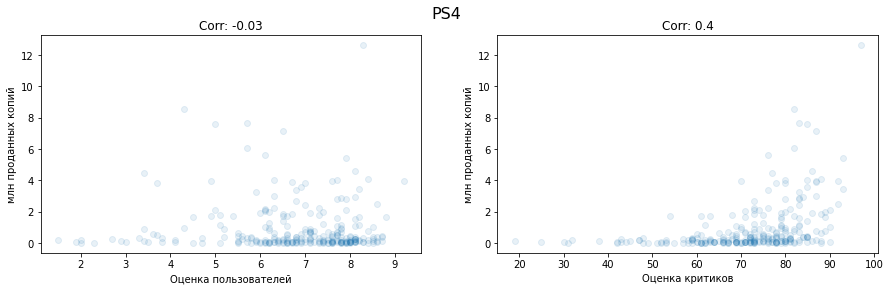

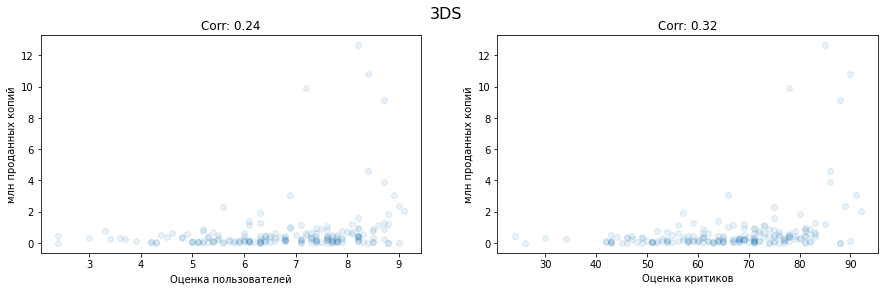

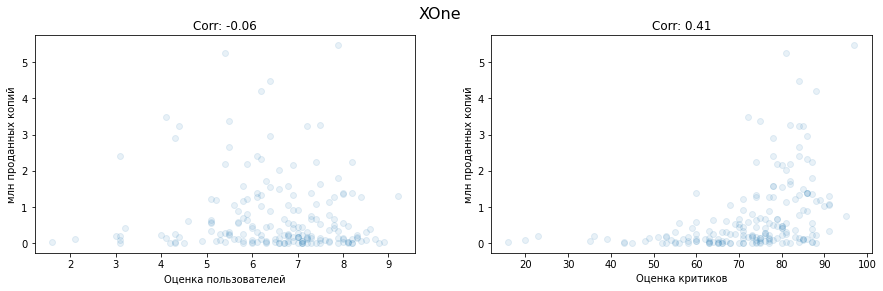

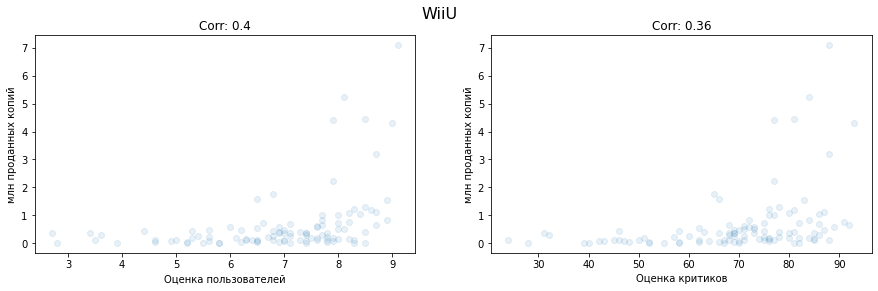

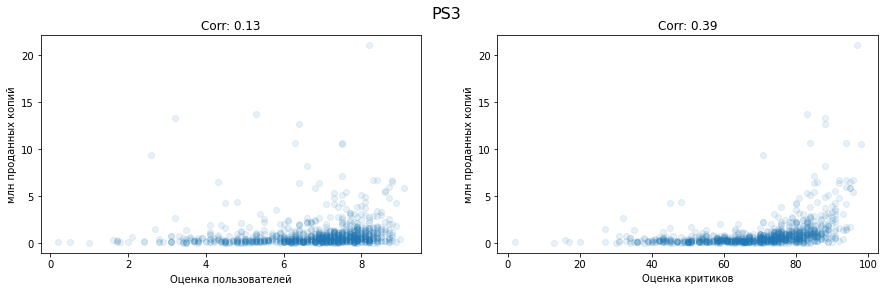

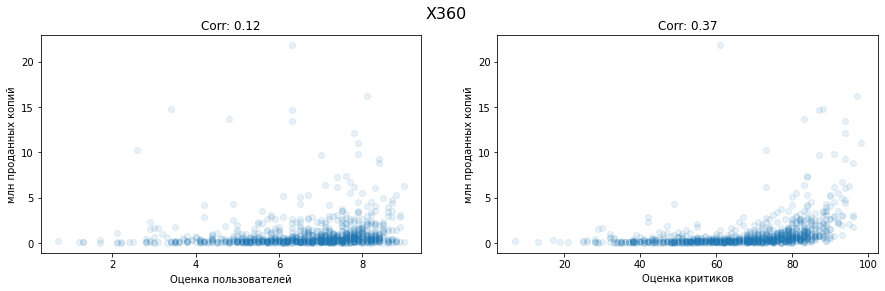

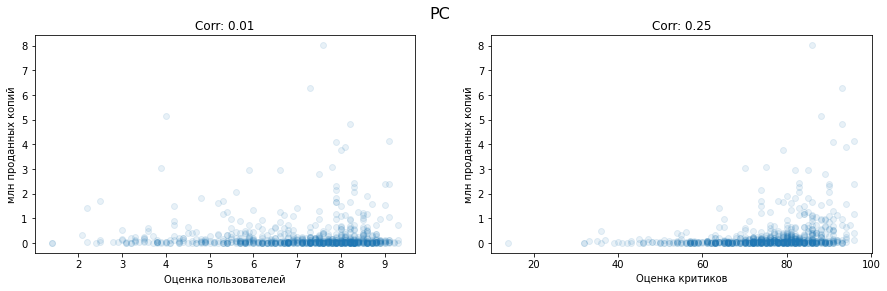

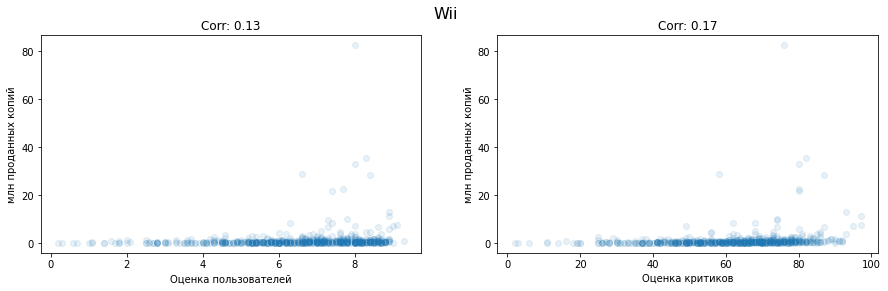

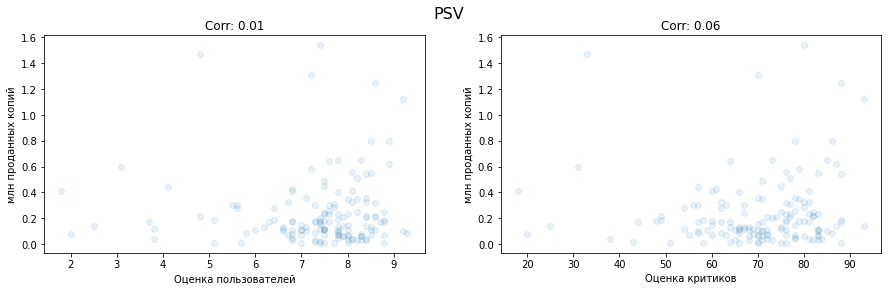

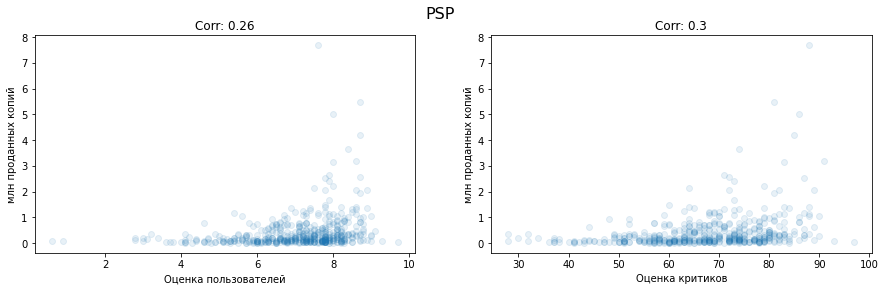

In [80]:
for platform in top_platforms:
    # исключим пропуски. Из-за действий в разделе обработки пропусков, None в user_score и critic_score 
    # находится в тех же строках
    new_dat = data[~data['user_score'].isna()].query('platform == @platform') 
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
    
    correlation = round(new_dat['all_saled'].corr(new_dat['user_score']), 2)
    axes[0].set_title(f'Corr: {correlation}')
    axes[0].set_ylabel('млн проданных копий')
    axes[0].set_xlabel('Оценка пользователей')
    axes[0].scatter(data=new_dat, x='user_score',y='all_saled', alpha=0.1)
    
    correlation = round(new_dat['all_saled'].corr(new_dat['critic_score']), 2)
    axes[1].set_title(f'Corr: {correlation}')
    axes[1].set_ylabel('млн проданных копий')
    axes[1].set_xlabel('Оценка критиков')
    axes[1].scatter(data=new_dat, x='critic_score',y='all_saled', alpha=0.1)
    fig.suptitle(platform,fontsize=16)
    plt.show()
    
    del new_dat

У большинства платформ очень слабая корреляция, в оценке пользователей XOne и PS4 даже антикорреляция. Стоит заметить, что распределение имеет вид экспоненты, а не линейный. Т.е. в большинстве с ростом оценки наблюдается плавный рост продаж.

Посмотрим на другие платфомы. 

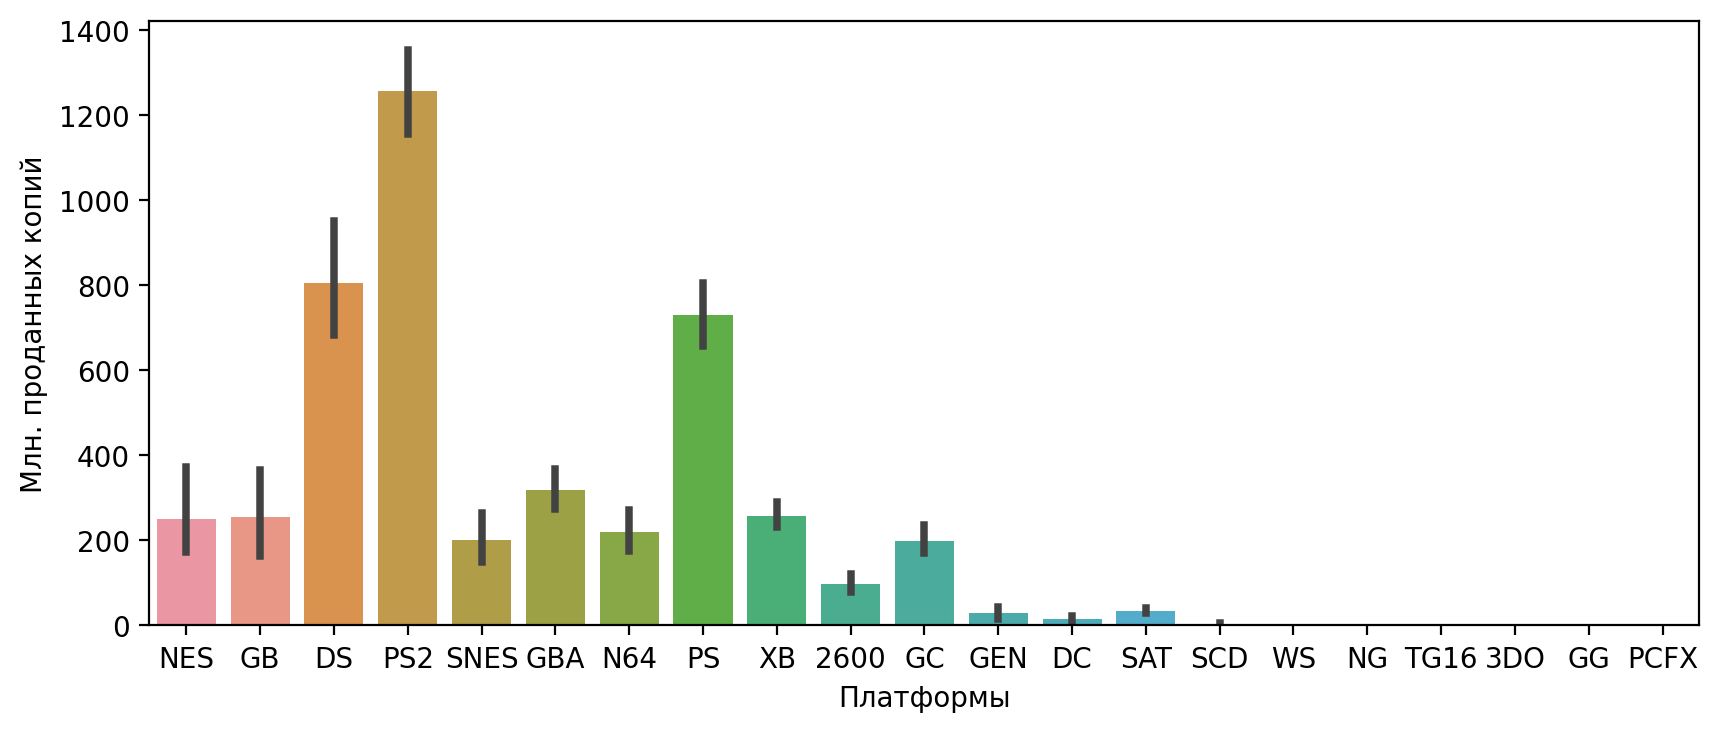

In [81]:
failed_platforms = [no_top for no_top in data['platform'].unique() if no_top not in top_platforms]
new_dat = data.query('platform in @failed_platforms')
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x='platform',y='all_saled',data=new_dat,estimator=np.sum)
plt.xlabel('Платформы')
plt.ylabel('Млн. проданных копий')
plt.show()

In [82]:
# посмотрим сколько удалось продать по самым непопулярным
dt = new_dat[new_dat['platform'].isin(['SCD', 'WS', 'NG', 'TG16', '3DO','GG', 'PCFX'])].pivot_table(index=['platform'], values=['na_sales', 'eu_sales', 'jp_sales', 'all_saled'], aggfunc='sum')
dt.head()

,all_saled,eu_sales,jp_sales,na_sales
platform,,,,
3DO,0.099976,0.000000,0.099976,0.0
GG,0.040009,0.000000,0.040009,0.0
NG,1.439453,0.000000,1.439453,0.0
PCFX,0.029999,0.000000,0.029999,0.0
SCD,1.860352,0.360107,0.449951,1.0


In [83]:
del new_dat

Что ж, самые непопулярные платформы продавались только в Японии. PS среди них выбивается, но в целом - ни одна платформа не достигла и 2млн копий.

### Распределение по жанрам

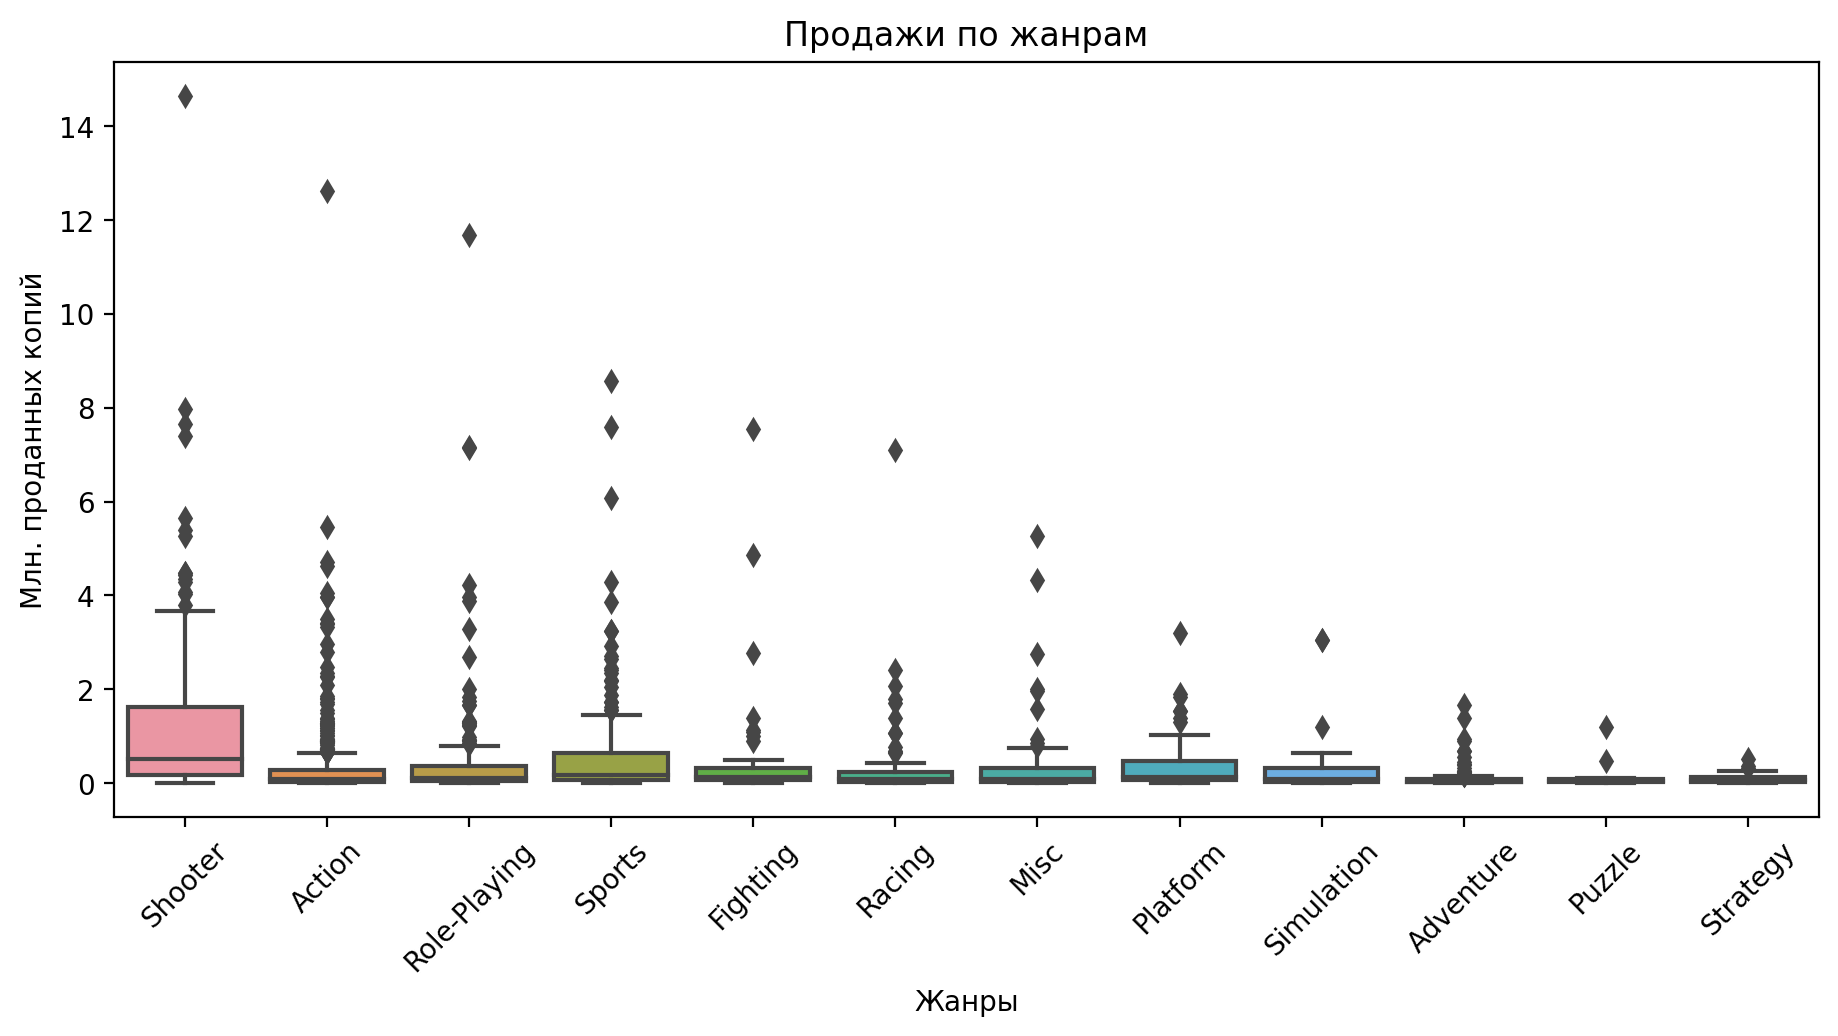

In [84]:
plt.figure(figsize=(11,5),dpi=200)
my_plot = sns.boxplot(x='genre',y='all_saled',data=actual_years[actual_years['platform'].isin(top_platforms)])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
#plt.ylim(0, 4)
plt.xlabel('Жанры')
plt.ylabel('Млн. проданных копий')
plt.title('Продажи по жанрам')
plt.show()


Последние 2 года популярны шутеры - как по "выстрелившим" играм, так и по третьему квартилю. Да и максимальное значение, не являющееся выбросом, находится почти у 4млн проданных копий. Посмотрим ближе на другие жанры и на медианы в целом.

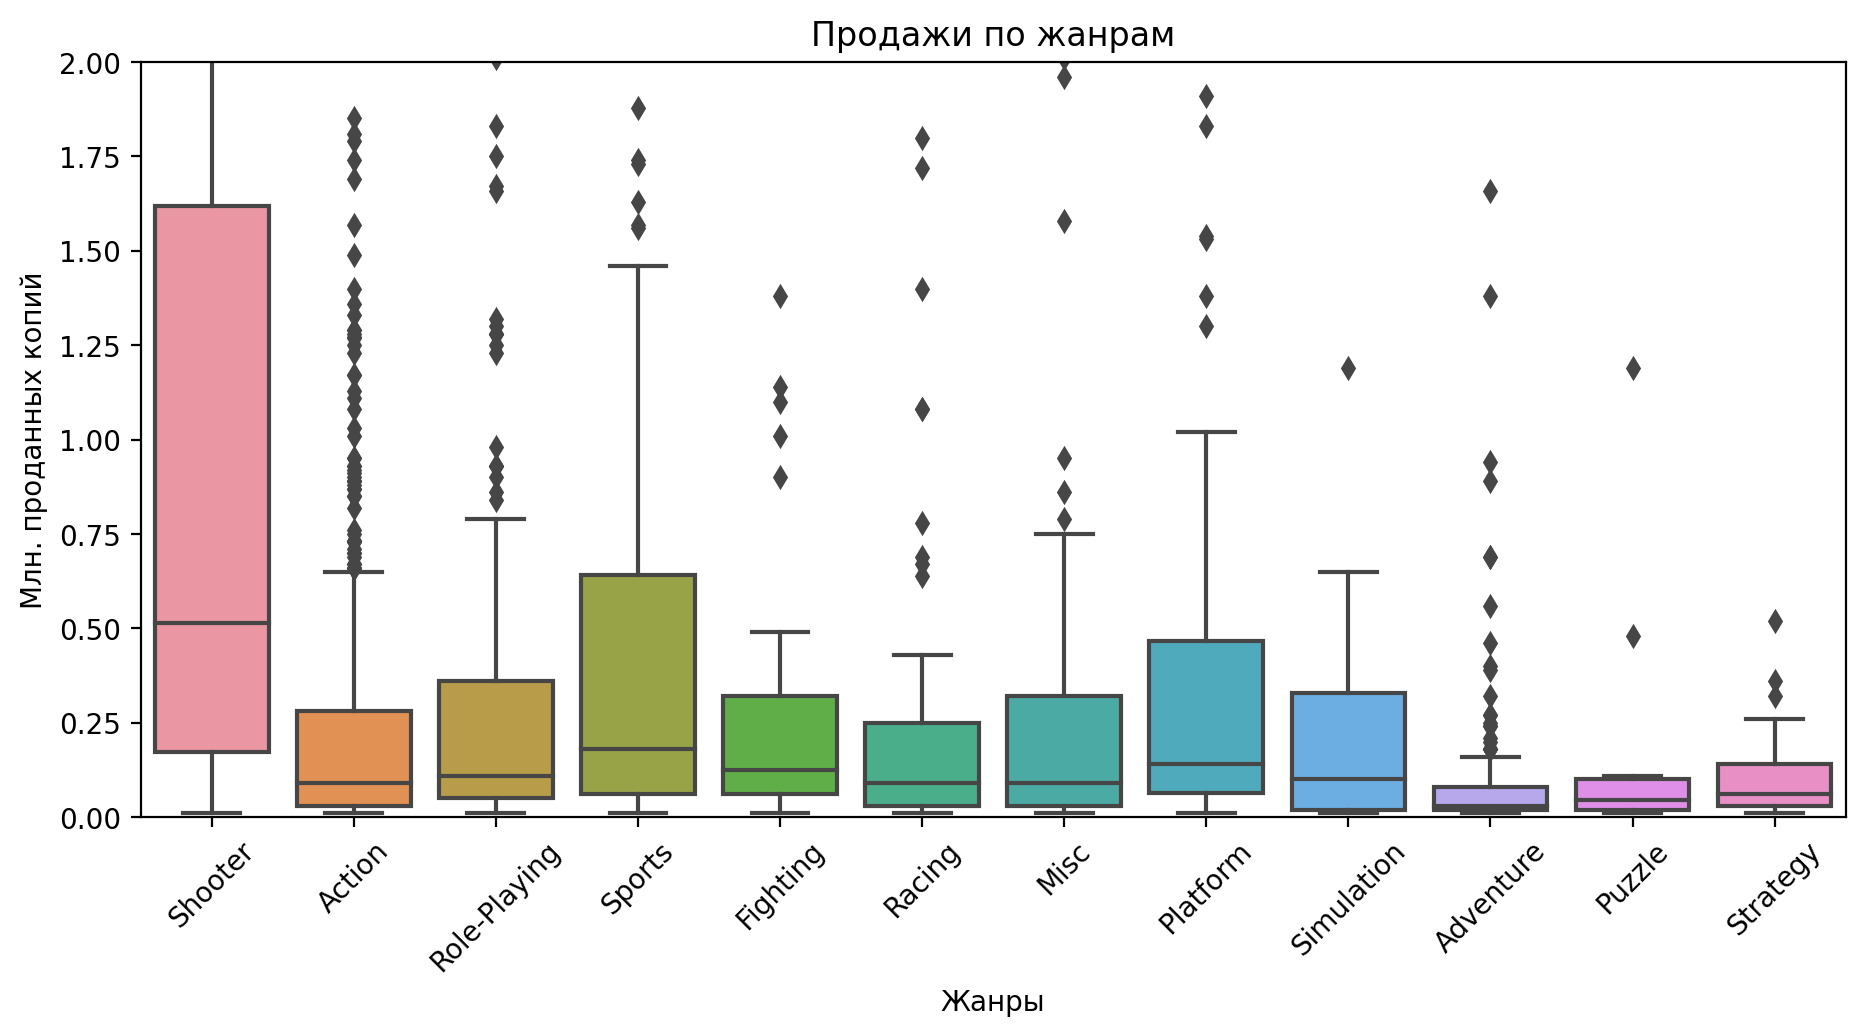

In [85]:
plt.figure(figsize=(11,5),dpi=200)
my_plot = sns.boxplot(x='genre',y='all_saled',data=actual_years[actual_years['platform'].isin(top_platforms)])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.ylim(0, 2)
plt.xlabel('Жанры')
plt.ylabel('Млн. проданных копий')
plt.title('Продажи по жанрам')
plt.show()

Следом программно расположились Action и Role-Playing - у них довольного много успешных игр, считаемых за выбросы, но третий квартиль ниже, чем у Sports. Да и медиана выше - около 0.24мнл копий. А вот у шутера перевалила за 0.5млн. Если магазин ищет стабильный доход, то лучше опираться на жанры Shooter и Sports. Но если хочет рискнуть - Action и  Role-Playing.

 А вот самыми непродаваемыми получились стратегия, пазлы и приключения. Скорее всего это связано с тем, что люди предпочитают расслабиться через игры, а не думать еще больше после рабочего дня.

### Краткий вывод


В большинстве далее будут использоваться данные за актуальный период - с 2014г. Золотое время выпускаемых игр пришлось на 2007-2008гг. Затем количество их уменьшалось и продолжает падать по сей день. Вероятно, разработчики работают над качеством.

Выявили топ-6 популярных платформ: PS2, X360, PS3, Wii, DS, PS. Средняя продолжительность жизни каждой сначала восходит, а затем угасает и напоминает график нормального распределения. Таким образом, средняя продолжительность жизни 10 лет. На данный момент работают на PS4, 3DS, XOne, WiiU, PS3, X360, PC, Wii, PSV, PSP. Другие перестали поддерживать ПО. Перспективными будем считать те, что продали более 10млн копий на 2016:  XOne, 3DS, PS4. Набирают популярность XOne и PS4 - их стоит выделить.

Медианы всех выбранных платформ не доходят до 0,3млн. проданных за актуальный период. Однако, у всех выбранных платформ есть выбросы - игры, которые "выстрелили". Получили подверждение, что PS4 и XOne перспективны - их максимальное значение, не являющееся выбросом около 1,5млн копий. 

Корреляция продаж и оценок(пользователя/критика) либо слабая, либо очень слабая. Однако заметна экспоненциальная зависимость между оценкой и количеством проданных копий: чем больше оценка, тем больше продажи. Но рост не линейный.

Последние 2 года популярны шутеры. Да и максимальное значение, не являющееся выбросом, находится почти у 4млн проданных копий. Следом - Action и Role-Playingб у них довольного много успешных игр, считаемых за выбросы, но третий квартиль ниже, чем у Sports. Да и медиана у последнего выше - около 0.24мнл копий. А вот у шутера перевалила за 0.5млн. Если магазин ищет стабильный доход, то лучше опираться на жанры Shooter и Sports. Но если хочет рискнуть - Action и  Role-Playing.
Самые непродаваемые: стратегия, пазлы. Скорее всего, люди хотят расслабиться, а не думать еще больше после рабочего дня.

## Портрет пользователей каждого региона

### Обзор рынка платформ

In [86]:
def groub_and_return(data, country, param, excludion=''):
    
    if excludion == '':
            df = data.groupby(param)[country].sum().sort_values(ascending=False)
            top = df.head(5)
            other = df.tail(len(df) - 5).sum()
            labels = list(top.index) + ['Other']
            sizes = list(top) + [other]
            return sizes, labels
    else:
        # если он существует
        try:
            df = data.groupby(param)[country].sum().sort_values(ascending=False)
            top = df.head(5)
            if excludion in (top):
                other = df[df.index == excludion].sum()
                df.drop(index=excludion, inplace=True)
                top = df.head(4)
                try:
                    other.join(df.tail(len(df) - 4).sum())
                except:
                    pass
            else:
                other = df.tail(len(df) - 5).sum()
            labels = list(top.index) + ['Other']
            sizes = list(top) + [other]
            return sizes, labels
        except:
            print('Ошибка выполнения. Проверьте правильность заполнения')
            return None
            
    

In [87]:
# всякие объявления для автоматизации графиков
counrties = {'na_sales': 'Северная Америка','eu_sales': 'Европа', 'jp_sales': 'Япония'}
explode = (0.1, 0, 0, 0, 0, 0)
colors = sns.color_palette('pastel')[ 0:6 ]

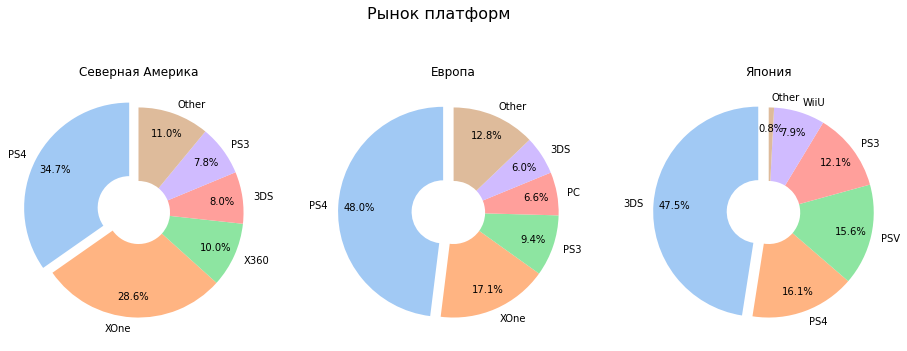

In [88]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
parametr = 'platform'
counter = 0

for key,value in counrties.items():
    sizes, labels = groub_and_return(actual_years, key, parametr )
    axes[counter].set_title(value)
    axes[counter].pie(sizes, labels=labels, \
                autopct='%1.1f%%', startangle=90, colors = colors,wedgeprops=dict(width=0.7), explode= explode,\
                     pctdistance=0.8)
    counter += 1
 
fig.suptitle('Рынок платформ',fontsize=16);

### Обзор жанров

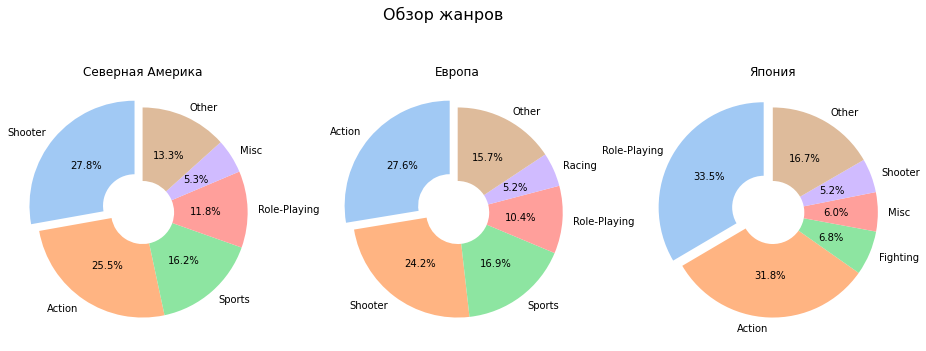

In [89]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
parametr = 'genre'
counter = 0

for key,value in counrties.items():
    sizes, labels = groub_and_return(actual_years, key, parametr )
    axes[counter].set_title(value)
    axes[counter].pie(sizes, labels=labels, \
                autopct='%1.1f%%', startangle=90, colors = colors,wedgeprops=dict(width=0.7), explode= explode)
    counter += 1
 
fig.suptitle('Обзор жанров',fontsize=16);



### Обзор рейтингов

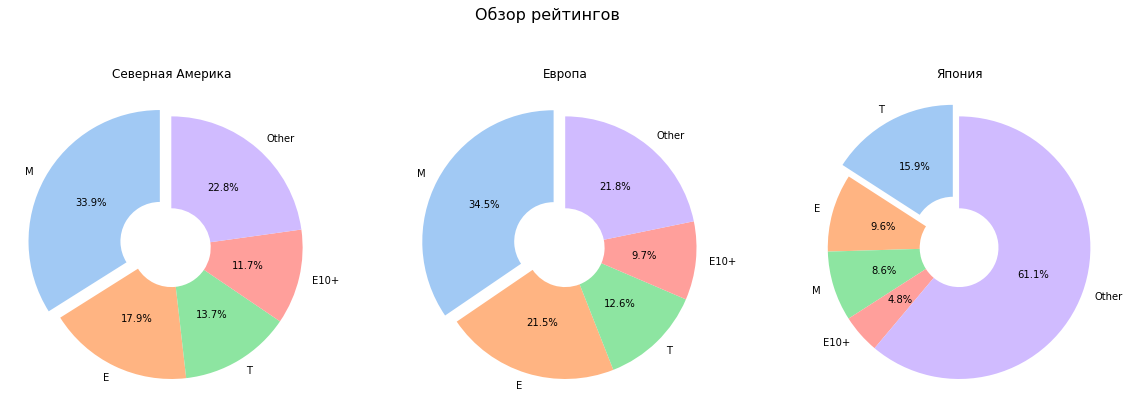

In [90]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,7))
parametr = 'rating'
excludion = 'NoRat'
counter = 0

for key,value in counrties.items():
    sizes, labels = groub_and_return(actual_years, key, parametr, excludion)
    axes[counter].set_title(value)
    axes[counter].pie(sizes, labels=labels, \
                autopct='%1.1f%%', startangle=90, colors = colors,wedgeprops=dict(width=0.7), explode= explode[:5])
    counter += 1
 
fig.suptitle('Обзор рейтингов',fontsize=16);


### Краткий вывод


3 самых популярных рейтинга: M(Для взрослых), E(Для всех), T(Подросткам). В Северной Америке и Европе лучше всего продаются M, а вот в Японии - T. В Others были помещены все NoRat.

По жанрам в Европе лучше продается Action, затем Shooter и Sports.В Северной Америке ситуация похожа, только Shooter сместил Action. В Японии все потеснили ролевые игры - 33.5% рынка, сразу за ним Action(31%). Это может объясняться культурными особенностями и собсвенным производством данного жанра(т.е. доступностью).

К 2016г популярным являются PS4 во всех регионах: в Европе и Северной Америке они на 1 месте(на втором - XOne), а в Японии только набирает обороты - на 2м. Если интернет-магазин базируется на Японских пользователях, то выгоднее 3DS.

## Проверка гипотез

In [91]:
actual_years = actual_years[~actual_years['user_score'].isna()]

### Гипотеза 1

**Нулевой гипотезой** будет: Средние пользовательские рейтинги платформ Xbox One и PC равны.  
**Альтернативной** - гипотеза "Средние рейтнги пользователей Xbox One и PC не равны".

In [92]:
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(actual_years[(actual_years['platform'] == 'XOne')]['user_score'], \
                       actual_years[actual_years['platform'] == 'PC']['user_score'], equal_var = False,\
                       alternative = 'two-sided')
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.1313093382484397
Не получилось отвергнуть нулевую гипотезу


#### График histplot

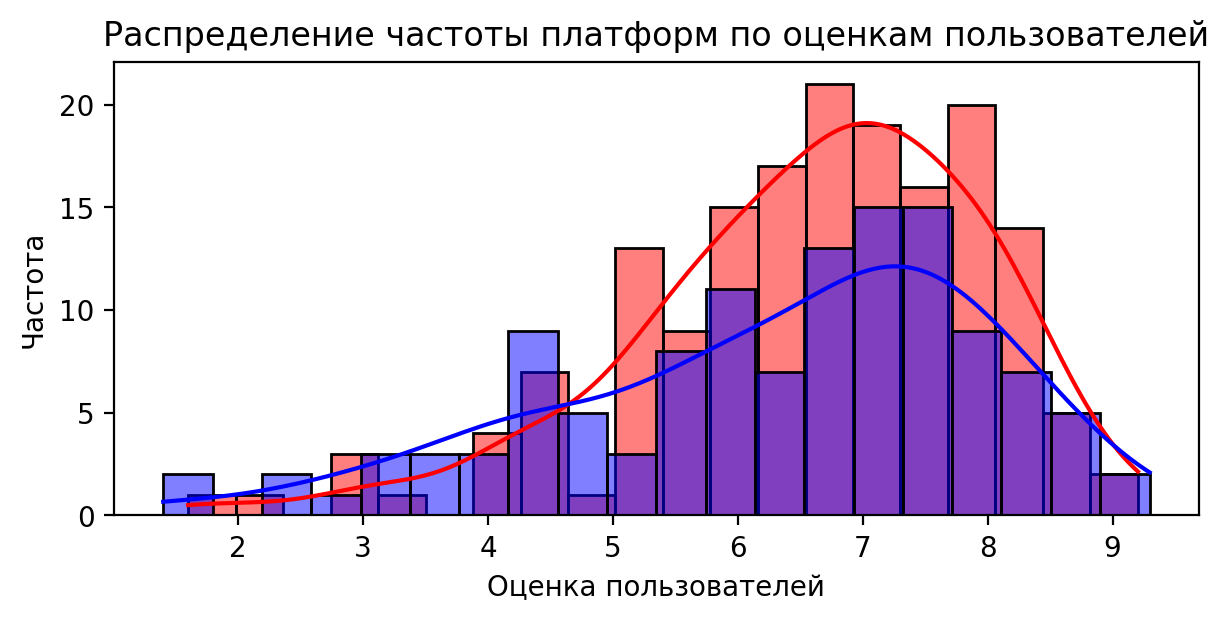

In [93]:
plt.figure(figsize=(7,3),dpi=200)
sns.histplot(actual_years[actual_years['platform'] == 'XOne']['user_score'], \
             bins=20, color='red', label='label', kde=True)
sns.histplot(actual_years[actual_years['platform'] == 'PC']['user_score'], \
             bins=20, color='blue', label='label', kde=True)
plt.xlabel('Оценка пользователей')
plt.ylabel('Частота')
plt.title('Распределение частоты платформ по оценкам пользователей');

#### Вывод по гипотезе

Нулевой гипотезой была гипотеза о равенстве средних наших выборок. p-value маленькое, т.о не можем отвергнуть нулевую гипотезу.

По графику видно, что пик пригодится примерно на одно значение.

In [94]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Гипотеза 2

**Нулевая гипотеза**: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны. **Альтернативная**: рейтинги Action и Sports не равны.

In [95]:
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(actual_years[actual_years['genre'] == 'Action']['user_score'], \
                       actual_years[actual_years['genre'] == 'Sports']['user_score'], equal_var = False, \
                       alternative = 'two-sided')
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

P-value: 1.0492918622170415e-14
Отвергаем нулевую гипотезу


#### График histplot

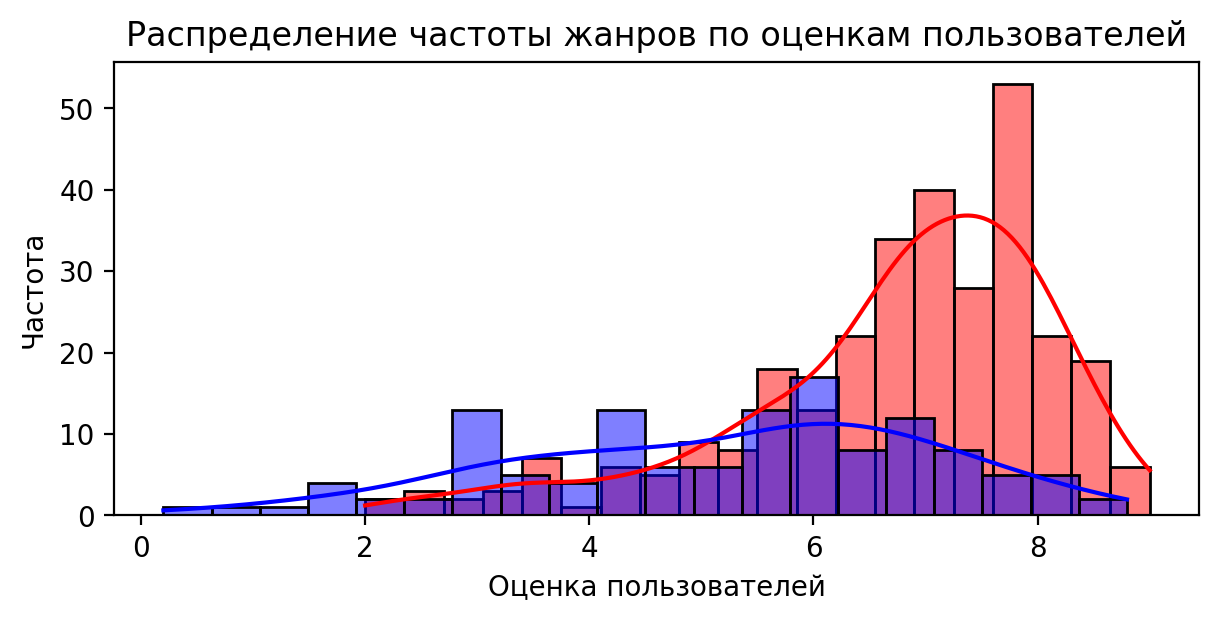

In [96]:
plt.figure(figsize=(7,3),dpi=200)
sns.histplot(actual_years[actual_years['genre'] == 'Action']['user_score'],\
             bins=20, color='red', label='label', kde=True)
sns.histplot(actual_years[actual_years['genre'] == 'Sports']['user_score'], \
             bins=20, color='blue', label='label', kde=True)
plt.xlabel('Оценка пользователей')
plt.ylabel('Частота')
plt.title('Распределение частоты жанров по оценкам пользователей');

#### Вывод по гипотезе 2

Отвергаем нулевую гипотезу о равенстве рейтингов жанров Action и Sports в пользу альтернативной. По графику видно, что оценки Action больше Sports.

## Общий вывод

В данных довольно много пропусков(до 51%), особенно в разделах оценок игр и рейтинга. Удалили 2 дубликата. При дальнейшем исследовании неявные дубликаты обнаружены не были.

Названия колонок были приведены к нижнему регистру. Преобразованы типы данных столбцов na_sales, eu_sales, jp_sales, other_sales, critic_score к float16. Также создан новый столбец того же типа all_saled - сумма продаж по всем 4 столбцам. Пропуски в year_of_release оставили, преобразовали столбец к int. Остальные - к string. Это безопаснее и экономит память.

Пропуски из name были удалены.
В rating они в большинстве обусловлены годом выпуска игр. Так, рейтинги начали давать примерно с 1996(годом основания ESRB считается  1994), постепенно набирая обороты. Но и игр становилось больше, так что, скорее всего, компания не успевала дать рейтинги всем, тк после 2006 все еще много игр без рейтинга. Около 43% датасета, не имеющего рейтинга, были заполнены строкой 'NoRat'.

Пропуски в оценках частично заполнены соседними: из uset_score в critic_score и наоборот. Другие - оставлены, поскольку не влияют на анализ.

    **Рекомендация**
    Данные могли потеряться по техническим причинам. При более детальном просмотре таблицы видно, что в стобцах, где пропущен рейтинг, также часто есть пропуски в critic_score, user_score. Скорее всего, это результат слияния нескольких таблиц. Рекомендуется проверить способ выгрузки данных. Также стоит пересмотреть хранение данных в float64 и object. Стоит перейти к менее затратным по памяти.

В большинстве далее будут использоваться данные за актуальный период - с 2014г. Золотое время выпускаемых игр пришлось на 2007-2008гг. Затем количество их уменьшалось и продолжает падать по сей день. Вероятно, разработчики работают над качеством.

Выявили топ-6 популярных платформ: PS2, X360, PS3, Wii, DS, PS. Средняя продолжительность жизни 10 лет. На данный момент работают на PS4, 3DS, XOne, WiiU, PS3, X360, PC, Wii, PSV, PSP. Другие перестали поддерживать ПО. Перспективными будем считать те, что продали более 10млн копий на 2016:  XOne, 3DS, PS4. Набирают популярность XOne и PS4 - их стоит выделить.

Медианы всех выбранных платформ не доходят до 0,3млн. проданных за актуальный период. Однако, у всех выбранных платформ есть выбросы - игры, которые "выстрелили". Получили подверждение, что PS4 и XOne перспективны - их максимальное значение, не являющееся выбросом около 1,5млн копий. 

Корреляция продаж и оценок(пользователя/критика) либо слабая, либо очень слабая. Однако заметна экспоненциальная зависимость между оценкой и количеством проданных копий: чем больше оценка, тем больше продажи. Но рост не линейный.

Последние 2 года популярны шутеры. Тут максимальное значение, не являющееся выбросом, находится почти у 4млн проданных копий. Следом - Action и Role-Playing, у них довольного много успешных игр, считаемых за выбросы, но третий квартиль ниже, чем у Sports. Да и медиана у последнего выше - около 0.24мнл копий. А вот у шутера перевалила за 0.5млн. Если магазин ищет стабильный доход, то лучше опираться на жанры Shooter и Sports. Но если хочет рискнуть - Action и  Role-Playing.
Самые непродаваемые: стратегия, пазлы. Скорее всего, люди хотят расслабиться, а не думать еще больше после рабочего дня.


3 самых популярных рейтинга: M(Для взрослых), E(Для всех), T(Подросткам). В Северной Америке и Европе лучше всего продаются M, а вот в Японии - T. В Others были помещены все NoRat.

По жанрам в Европе лучше продается Action, затем Shooter и Sports.В Северной Америке ситуация похожа, только Shooter сместил Action. В Японии все потеснили ролевые игры - 33.5% рынка, сразу за ним Action(31%). Это может объясняться культурными особенностями и собсвенным производством данного жанра(т.е. доступностью).

К 2016г популярным являются PS4 во всех регионах: в Европе и Северной Америке они на 1 месте(на втором - XOne), а в Японии только набирает обороты - на 2м. Если интернет-магазин базируется на Японских пользователях, то выгоднее 3DS.

Были проверены несколько гипотез. В первом не получилось отвергнуть нулевую гипотезу: Средние рейтнги пользователей Xbox One меньше, чем PC. Во второй случае нулевая гипотеза была отвергнула в пользу альтернативной : не равенство рейтингов жанров Action и Sports.